In [ ]:
import pandas as pd
import numpy as np



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
DATA_PATH = "/content/drive/MyDrive/capstone_data"


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.listdir('/content/drive/MyDrive')


['Transcript .pdf',
 'CoursePlan_CS0723_Cloud-Computing-.pdf',
 'Request for Substitution of Information Technology and Data Analytics.docx',
 'Syllabus.docx',
 'MASY Sequence SP21 - Concentration Prerequisites Worksheet (1) (3).pdf',
 'Untitled presentation (1).gslides',
 'Untitled presentation.gslides',
 'Class 4 - Homework.xlsx',
 'Class 4 - VS_Homework.xlsx',
 'Class 4 - VS_Homework.gsheet',
 'Class 4 - Homework.gsheet',
 'Homework- class 5.xlsx',
 'class 5 homework part 2.pdf',
 'MASY Sequence SP21 - Concentration Prerequisites Worksheet (1) (4).gdoc',
 'VishwaShah_Resume (2).docx',
 'MASY Sequence SP21 - Concentration Prerequisites Worksheet (1) (2).pdf',
 'PeerReview (2).xlsx',
 'VishwaShah_Resume (1).docx',
 'PeerReview (1).xlsx',
 'PeerReview.xlsx',
 'VishwaShah_Resume.docx',
 'MASY Sequence SP21 - Concentration Prerequisites Worksheet (1) (1).pdf',
 'MASY Sequence SP21 - Concentration Prerequisites Worksheet (1).pdf',
 'Strategic Marketing - Abacus Bank (Group C).gslides',
 '

In [ ]:
DATA_PATH = "/content/drive/MyDrive/Capstone_Data"


In [ ]:
import os
os.listdir(DATA_PATH)


['Colab Notebooks',
 'fmli232.csv',
 'fmli233.csv',
 'fmli234.csv',
 'fmli241.csv',
 'exp23.csv',
 'Untitled document.gdoc']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
DATA_PATH = "/content/drive/MyDrive/Capstone_Data"


In [ ]:
import os
os.listdir(DATA_PATH)


['Colab Notebooks',
 'fmli232.csv',
 'fmli233.csv',
 'fmli234.csv',
 'fmli241.csv',
 'exp23.csv',
 'Untitled document.gdoc']

In [ ]:
import pandas as pd

# List of all fmli files you uploaded
fmli_files = ["fmli232.csv", "fmli233.csv", "fmli234.csv", "fmli241.csv"]

# Load and combine into one dataframe
fmli_list = [pd.read_csv(f"{DATA_PATH}/{f}") for f in fmli_files]
fmli = pd.concat(fmli_list, ignore_index=True)

fmli.head()


,NEWID,DIRACC,DIRACC_,AGE_REF,AGE_REF_,AGE2,AGE2_,AS_COMP1,AS_C_MP1,AS_COMP2,...,CHDTXP,CHDTXP_,CHDTXPH,CHDTXPH_,NUM_VET,fftaxowe,fstaxowe,FINATXEM,FFTAXOWE,FSTAXOWE
0,5090604,1.0,D,74,D,72.0,D,1,D,1,...,NaN,A,NaN,A,1,0.0,0.0,40677.0,NaN,NaN
1,5090624,1.0,D,87,T,NaN,A,0,D,1,...,NaN,A,NaN,A,0,0.0,0.0,13787.0,NaN,NaN
2,5090634,1.0,D,58,D,NaN,A,0,D,1,...,NaN,A,NaN,A,0,20397.0,7544.0,107059.0,NaN,NaN
3,5090664,1.0,D,55,D,52.0,D,1,D,1,...,NaN,A,NaN,A,0,3552.0,1489.0,57932.4,NaN,NaN
4,5090674,1.0,D,31,D,31.0,D,1,D,2,...,NaN,A,NaN,A,0,415.0,0.0,36475.0,NaN,NaN


In [ ]:
fmli = fmli[[
    "NEWID",        # household ID
    "QINTRVYR",     # interview year
    "QINTRVMO",     # interview month
    "TOTEXPPQ",     # total quarterly expenditure
    "FINCBTAX"      # before-tax income (annual)
]]

fmli.head()


,NEWID,QINTRVYR,QINTRVMO,TOTEXPPQ,FINCBTAX
0,5090604,2023,4,12549.0000,40677
1,5090624,2023,4,3186.0000,13787
2,5090634,2023,4,19756.0001,135000
3,5090664,2023,4,10166.3500,0
4,5090674,2023,4,59444.7499,37420


In [ ]:
# Quarter calculation
fmli["QUARTER"] = ((fmli["QINTRVMO"] - 1) // 3 + 1).astype(int)

# Create QYEAR like 20232 (2023 Q2)
fmli["QYEAR"] = fmli["QINTRVYR"].astype(int) * 10 + fmli["QUARTER"]

fmli[["NEWID", "QINTRVYR", "QINTRVMO", "QUARTER", "QYEAR", "FINCBTAX", "TOTEXPPQ"]].head()


,NEWID,QINTRVYR,QINTRVMO,QUARTER,QYEAR,FINCBTAX,TOTEXPPQ
0,5090604,2023,4,2,20232,40677,12549.0000
1,5090624,2023,4,2,20232,13787,3186.0000
2,5090634,2023,4,2,20232,135000,19756.0001
3,5090664,2023,4,2,20232,0,10166.3500
4,5090674,2023,4,2,20232,37420,59444.7499


In [ ]:
exp = pd.read_csv(f"{DATA_PATH}/exp23.csv")
exp.head()


,QYEAR,NEWID,SEQNO,ALCNO,REC_ORIG,CGTEXPW,CGTEXPW_,OTOBQ,OTOBQ_,JFDBAWQV,...,JGREXPQV,JGRE_PQV,JCGEXPQV,JCGE_PQV,JOTOBQV,JOTOBQV_,JFDGFTQV,JFDG_TQV,CGTPURCH,OTBPURCH
0,20232,5090604,7,0,1,2.0,D,2.0,D,390,...,845,D,NaN,A,NaN,A,0,D,NaN,NaN
1,20232,5090624,2,0,1,2.0,D,2.0,D,0,...,1430,D,NaN,A,NaN,A,0,D,NaN,NaN
2,20232,5090634,2,0,1,2.0,D,2.0,D,650,...,975,D,NaN,A,NaN,A,600,D,NaN,NaN
3,20232,5090664,4,0,1,2.0,D,2.0,D,325,...,910,D,NaN,A,NaN,A,0,D,NaN,NaN
4,20232,5090674,5,0,1,2.0,D,2.0,D,650,...,5200,D,NaN,A,NaN,A,600,D,NaN,NaN


In [ ]:
exp_small = exp[[
    "NEWID",
    "QYEAR",
    "JFDBAWQV",  # Food away from home
    "JGREXPQV",  # Groceries
    "JCGEXPQV",  # Clothing
    "JOTOBQV",   # Other goods
    "JFDGFTQV"   # Food gifts
]].copy()

exp_small = exp_small.rename(columns={
    "JFDBAWQV": "FoodAway",
    "JGREXPQV": "Groceries",
    "JCGEXPQV": "Clothing",
    "JOTOBQV":  "OtherGoods",
    "JFDGFTQV": "FoodGifts"
})

exp_small.head()


,NEWID,QYEAR,FoodAway,Groceries,Clothing,OtherGoods,FoodGifts
0,5090604,20232,390,845,NaN,NaN,0
1,5090624,20232,0,1430,NaN,NaN,0
2,5090634,20232,650,975,NaN,NaN,600
3,5090664,20232,325,910,NaN,NaN,0
4,5090674,20232,650,5200,NaN,NaN,600


In [ ]:
data = pd.merge(
    fmli,
    exp_small,
    on=["NEWID", "QYEAR"],
    how="inner"
)

data.head(), data.shape


(     NEWID  QINTRVYR  QINTRVMO    TOTEXPPQ  FINCBTAX  QUARTER  QYEAR  \
 0  5090604      2023         4  12549.0000     40677        2  20232   
 1  5090624      2023         4   3186.0000     13787        2  20232   
 2  5090634      2023         4  19756.0001    135000        2  20232   
 3  5090664      2023         4  10166.3500         0        2  20232   
 4  5090674      2023         4  59444.7499     37420        2  20232   
 
    FoodAway  Groceries  Clothing  OtherGoods  FoodGifts  
 0       390        845       NaN         NaN          0  
 1         0       1430       NaN         NaN          0  
 2       650        975       NaN         NaN        600  
 3       325        910       NaN         NaN          0  
 4       650       5200       NaN         NaN        600  ,
 (18870, 12))

,NEWID,QYEAR,Income_Monthly,Expense_Monthly,NetCash_Monthly,Groceries,FoodAway,Clothing,OtherGoods
0,5090604,20232,3389.750000,4183.000000,-793.250000,845,390,NaN,NaN
1,5090624,20232,1148.916667,1062.000000,86.916667,1430,0,NaN,NaN
2,5090634,20232,11250.000000,6585.333367,4664.666633,975,650,NaN,NaN
3,5090664,20232,0.000000,3388.783333,-3388.783333,910,325,NaN,NaN
4,5090674,20232,3118.333333,19814.916633,-16696.583300,5200,650,NaN,NaN


In [ ]:
# Convert QYEAR (e.g., 20232) → Year and Quarter
data["Year"] = data["QYEAR"] // 10
data["Quarter"] = data["QYEAR"] % 10

# Create 3 monthly rows per quarter
expanded_rows = []

for _, row in data.iterrows():
    year = row["Year"]
    quarter = row["Quarter"]

    # Map quarter → fixed months
    if quarter == 1:
        months = [1, 2, 3]
    elif quarter == 2:
        months = [4, 5, 6]
    elif quarter == 3:
        months = [7, 8, 9]
    else:
        months = [10, 11, 12]

    for m in months:
        # Copy all row fields into monthly record
        new_row = row.copy()
        new_row["Month"] = m

        # Create a proper date
        new_row["Date"] = pd.to_datetime(f"{int(year)}-{int(m):02d}-01")

        expanded_rows.append(new_row)

# Final monthly dataset
monthly_data = pd.DataFrame(expanded_rows)

monthly_data = monthly_data.sort_values(["NEWID", "Date"]).reset_index(drop=True)

monthly_data.head(), monthly_data.shape


(       NEWID  QINTRVYR  QINTRVMO  TOTEXPPQ  FINCBTAX  QUARTER    QYEAR  \
 0  5090604.0    2023.0       4.0   12549.0   40677.0      2.0  20232.0   
 1  5090604.0    2023.0       4.0   12549.0   40677.0      2.0  20232.0   
 2  5090604.0    2023.0       4.0   12549.0   40677.0      2.0  20232.0   
 3  5090624.0    2023.0       4.0    3186.0   13787.0      2.0  20232.0   
 4  5090624.0    2023.0       4.0    3186.0   13787.0      2.0  20232.0   
 
    FoodAway  Groceries  Clothing  ...  FoodGifts  Income_Quarterly  \
 0     390.0      845.0       NaN  ...        0.0          10169.25   
 1     390.0      845.0       NaN  ...        0.0          10169.25   
 2     390.0      845.0       NaN  ...        0.0          10169.25   
 3       0.0     1430.0       NaN  ...        0.0           3446.75   
 4       0.0     1430.0       NaN  ...        0.0           3446.75   
 
    Income_Monthly  Expense_Quarterly  Expense_Monthly  NetCash_Monthly  \
 0     3389.750000            12549.0        

In [ ]:
(monthly_data.head(), monthly_data.shape)


(       NEWID  QINTRVYR  QINTRVMO  TOTEXPPQ  FINCBTAX  QUARTER    QYEAR  \
 0  5090604.0    2023.0       4.0   12549.0   40677.0      2.0  20232.0   
 1  5090604.0    2023.0       4.0   12549.0   40677.0      2.0  20232.0   
 2  5090604.0    2023.0       4.0   12549.0   40677.0      2.0  20232.0   
 3  5090624.0    2023.0       4.0    3186.0   13787.0      2.0  20232.0   
 4  5090624.0    2023.0       4.0    3186.0   13787.0      2.0  20232.0   
 
    FoodAway  Groceries  Clothing  ...  FoodGifts  Income_Quarterly  \
 0     390.0      845.0       NaN  ...        0.0          10169.25   
 1     390.0      845.0       NaN  ...        0.0          10169.25   
 2     390.0      845.0       NaN  ...        0.0          10169.25   
 3       0.0     1430.0       NaN  ...        0.0           3446.75   
 4       0.0     1430.0       NaN  ...        0.0           3446.75   
 
    Income_Monthly  Expense_Quarterly  Expense_Monthly  NetCash_Monthly  \
 0     3389.750000            12549.0        

In [ ]:
features = [
    "Income_Monthly",
    "Expense_Monthly",
    "Groceries",
    "FoodAway",
    "Clothing",
    "OtherGoods",
    "FoodGifts",
]

target = "NetCash_Monthly"

model_data = monthly_data[["NEWID", "Date"] + features + [target]].copy()
model_data.head()


,NEWID,Date,Income_Monthly,Expense_Monthly,Groceries,FoodAway,Clothing,OtherGoods,FoodGifts,NetCash_Monthly
0,5090604.0,2023-04-01,3389.750000,4183.0,845.0,390.0,NaN,NaN,0.0,-793.250000
1,5090604.0,2023-05-01,3389.750000,4183.0,845.0,390.0,NaN,NaN,0.0,-793.250000
2,5090604.0,2023-06-01,3389.750000,4183.0,845.0,390.0,NaN,NaN,0.0,-793.250000
3,5090624.0,2023-04-01,1148.916667,1062.0,1430.0,0.0,NaN,NaN,0.0,86.916667
4,5090624.0,2023-05-01,1148.916667,1062.0,1430.0,0.0,NaN,NaN,0.0,86.916667


In [ ]:
model_data = model_data.fillna(0)
model_data.head()


,NEWID,Date,Income_Monthly,Expense_Monthly,Groceries,FoodAway,Clothing,OtherGoods,FoodGifts,NetCash_Monthly
0,5090604.0,2023-04-01,3389.750000,4183.0,845.0,390.0,0.0,0.0,0.0,-793.250000
1,5090604.0,2023-05-01,3389.750000,4183.0,845.0,390.0,0.0,0.0,0.0,-793.250000
2,5090604.0,2023-06-01,3389.750000,4183.0,845.0,390.0,0.0,0.0,0.0,-793.250000
3,5090624.0,2023-04-01,1148.916667,1062.0,1430.0,0.0,0.0,0.0,0.0,86.916667
4,5090624.0,2023-05-01,1148.916667,1062.0,1430.0,0.0,0.0,0.0,0.0,86.916667


In [ ]:
model_data = model_data.sort_values(["NEWID", "Date"]).reset_index(drop=True)
model_data.head()


,NEWID,Date,Income_Monthly,Expense_Monthly,Groceries,FoodAway,Clothing,OtherGoods,FoodGifts,NetCash_Monthly
0,5090604.0,2023-04-01,3389.750000,4183.0,845.0,390.0,0.0,0.0,0.0,-793.250000
1,5090604.0,2023-05-01,3389.750000,4183.0,845.0,390.0,0.0,0.0,0.0,-793.250000
2,5090604.0,2023-06-01,3389.750000,4183.0,845.0,390.0,0.0,0.0,0.0,-793.250000
3,5090624.0,2023-04-01,1148.916667,1062.0,1430.0,0.0,0.0,0.0,0.0,86.916667
4,5090624.0,2023-05-01,1148.916667,1062.0,1430.0,0.0,0.0,0.0,0.0,86.916667


In [ ]:
model_data.head()
model_data.columns


Index(['NEWID', 'Date', 'Income_Monthly', 'Expense_Monthly', 'Groceries',
       'FoodAway', 'Clothing', 'OtherGoods', 'FoodGifts', 'NetCash_Monthly'],
      dtype='object')

In [ ]:
model_data["Date"] = pd.to_datetime(model_data["Date"])
model_data["Year"] = model_data["Date"].dt.year
model_data["Month"] = model_data["Date"].dt.month


In [ ]:
model_data = model_data.sort_values(["NEWID", "Date"]).reset_index(drop=True)
model_data.head()


,NEWID,Date,Income_Monthly,Expense_Monthly,Groceries,FoodAway,Clothing,OtherGoods,FoodGifts,NetCash_Monthly,Year,Month
0,5090604.0,2023-04-01,3389.750000,4183.0,845.0,390.0,0.0,0.0,0.0,-793.250000,2023,4
1,5090604.0,2023-05-01,3389.750000,4183.0,845.0,390.0,0.0,0.0,0.0,-793.250000,2023,5
2,5090604.0,2023-06-01,3389.750000,4183.0,845.0,390.0,0.0,0.0,0.0,-793.250000,2023,6
3,5090624.0,2023-04-01,1148.916667,1062.0,1430.0,0.0,0.0,0.0,0.0,86.916667,2023,4
4,5090624.0,2023-05-01,1148.916667,1062.0,1430.0,0.0,0.0,0.0,0.0,86.916667,2023,5


In [ ]:
import numpy as np

SEQ_LEN = 12
X_list = []
y_list = []

for _, group in model_data.groupby("NEWID"):
    group = group.reset_index(drop=True)

    values = group[[
        "Income_Monthly",
        "Expense_Monthly",
        "Groceries",
        "FoodAway",
        "Clothing",
        "OtherGoods",
        "FoodGifts",
        "NetCash_Monthly"
    ]].values

    for i in range(len(group) - SEQ_LEN):
        seq_x = values[i:i+SEQ_LEN, :-1]   # features
        seq_y = values[i+SEQ_LEN, -1]      # next month's cashflow

        X_list.append(seq_x)
        y_list.append(seq_y)

X = np.array(X_list)
y = np.array(y_list)

X.shape, y.shape


((0,), (0,))

In [ ]:
model_data.groupby("NEWID").size().sort_values().head(20)


,0
NEWID,
5607931.0,3
5607901.0,3
5607861.0,3
5607851.0,3
5607841.0,3
5607811.0,3
5607761.0,3
5607731.0,3
5607721.0,3


In [ ]:
import numpy as np

SEQ_LEN = 3  # Use 3 months of history
X_list = []
y_list = []

for _, group in model_data.groupby("NEWID"):
    group = group.reset_index(drop=True)

    # Extract 8 columns: 7 features + 1 target
    values = group[
        [
            "Income_Monthly",
            "Expense_Monthly",
            "Groceries",
            "FoodAway",
            "Clothing",
            "OtherGoods",
            "FoodGifts",
            "NetCash_Monthly"
        ]
    ].values

    # Build sliding windows
    for i in range(len(group) - SEQ_LEN):
        seq_x = values[i:i+SEQ_LEN, :-1]  # first 7 columns → features
        seq_y = values[i+SEQ_LEN, -1]     # next month's NetCash

        X_list.append(seq_x)
        y_list.append(seq_y)

# Convert to numpy
X = np.array(X_list)
y = np.array(y_list)

X.shape, y.shape


((0,), (0,))

In [ ]:
SEQ_LEN = 2


In [ ]:
X.shape, y.shape


((0,), (0,))

In [ ]:
model_data.groupby("NEWID").size().value_counts()


,count
3,18870


In [ ]:
monthly_data.groupby("NEWID").size().value_counts()


,count
3,18870


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving exp23.csv to exp23.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving fmli232.csv to fmli232.csv
Saving fmli233.csv to fmli233.csv
Saving fmli234.csv to fmli234.csv
Saving fmli241.csv to fmli241.csv


In [ ]:
import os
os.listdir()


['.config',
 'fmli241.csv',
 'fmli234.csv',
 'fmli233.csv',
 'fmli232.csv',
 'exp23.csv',
 'sample_data']

In [ ]:
import pandas as pd

fmli_paths = [
    "fmli232.csv",
    "fmli233.csv",
    "fmli234.csv",
    "fmli241.csv"
]

fmli = pd.concat([pd.read_csv(p) for p in fmli_paths], ignore_index=True)
fmli.shape


(18871, 821)

In [ ]:
fmli.columns.tolist()


['NEWID',
 'DIRACC',
 'DIRACC_',
 'AGE_REF',
 'AGE_REF_',
 'AGE2',
 'AGE2_',
 'AS_COMP1',
 'AS_C_MP1',
 'AS_COMP2',
 'AS_C_MP2',
 'AS_COMP3',
 'AS_C_MP3',
 'AS_COMP4',
 'AS_C_MP4',
 'AS_COMP5',
 'AS_C_MP5',
 'BATHRMQ',
 'BATHRMQ_',
 'BEDROOMQ',
 'BEDR_OMQ',
 'BLS_URBN',
 'BUILDING',
 'BUIL_ING',
 'CUTENURE',
 'CUTE_URE',
 'EARNCOMP',
 'EARN_OMP',
 'EDUC_REF',
 'EDUC0REF',
 'EDUCA2',
 'EDUCA2_',
 'FAM_SIZE',
 'FAM__IZE',
 'FAM_TYPE',
 'FAM__YPE',
 'FGOVRETX',
 'FGOV_ETX',
 'FINCBTAX',
 'FINCBT_X',
 'FINDRETX',
 'FIND_ETX',
 'FINLWT21',
 'FJSSDEDX',
 'FJSS_EDX',
 'FPRIPENX',
 'FPRI_ENX',
 'FRRDEDX',
 'FRRDEDX_',
 'FRRETIRX',
 'FRRE_IRX',
 'FSALARYX',
 'FSAL_RYX',
 'FSSIX',
 'FSSIX_',
 'HLFBATHQ',
 'HLFB_THQ',
 'INC_HRS1',
 'INC__RS1',
 'INC_HRS2',
 'INC__RS2',
 'INC_RANK',
 'INC__ANK',
 'INCNONW1',
 'INCN_NW1',
 'INCNONW2',
 'INCN_NW2',
 'INCOMEY1',
 'INCO_EY1',
 'INCOMEY2',
 'INCO_EY2',
 'INCWEEK1',
 'INCW_EK1',
 'INCWEEK2',
 'INCW_EK2',
 'MISCTAXX',
 'MISC_AXX',
 'LUMPSUMX',
 'LUMP_UMX

In [ ]:
fmli_small = fmli[[
    "NEWID",
    "QINTRVYR",
    "QINTRVMO",
    "FINCBTAX",
    "TOTEXPPQ"
]].copy()

# Derive QUARTER
import numpy as np
fmli_small["QUARTER"] = np.ceil(fmli_small["QINTRVMO"] / 3).astype(int)

# Rename
fmli_small = fmli_small.rename(columns={
    "QINTRVYR": "Year",
    "QINTRVMO": "InterviewMonth"
})

fmli_small.head()


,NEWID,Year,InterviewMonth,FINCBTAX,TOTEXPPQ,QUARTER
0,5090604,2023,4,40677,12549.0000,2
1,5090624,2023,4,13787,3186.0000,2
2,5090634,2023,4,135000,19756.0001,2
3,5090664,2023,4,0,10166.3500,2
4,5090674,2023,4,37420,59444.7499,2


In [ ]:
quarters = {
    1: [1,2,3],
    2: [4,5,6],
    3: [7,8,9],
    4: [10,11,12]
}

expanded_rows = []

for _, row in fmli_small.iterrows():
    year = int(row["Year"])
    q = int(row["QUARTER"])

    for m in quarters[q]:
        r = row.copy()
        r["Month"] = m
        r["Date"] = pd.to_datetime(f"{year}-{m:02d}-01")
        expanded_rows.append(r)

monthly_data = pd.DataFrame(expanded_rows)
monthly_data.shape


(56613, 8)

In [ ]:
monthly_data["Income_Monthly"] = monthly_data["FINCBTAX"] / 4
monthly_data["Expense_Monthly"] = monthly_data["TOTEXPPQ"] / 3
monthly_data["NetCash_Monthly"] = (
    monthly_data["Income_Monthly"] - monthly_data["Expense_Monthly"]
)


In [ ]:
monthly_data.groupby("NEWID").size().value_counts().head()


,count
3,18871


In [ ]:
expanded_rows = []

for _, row in fmli_small.iterrows():
    year = int(row["Year"])

    for m in range(1, 13):
        r = row.copy()
        r["Month"] = m
        r["Date"] = pd.to_datetime(f"{year}-{m:02d}-01")

        # Monthly income estimate
        r["Income_Monthly"] = row["FINCBTAX"] / 12

        # Monthly expense estimate
        r["Expense_Monthly"] = row["TOTEXPPQ"] / 3 / 3

        # Cashflow
        r["NetCash_Monthly"] = r["Income_Monthly"] - r["Expense_Monthly"]

        expanded_rows.append(r)

monthly_data = pd.DataFrame(expanded_rows)
monthly_data.shape


(226452, 11)

In [ ]:
monthly_data.groupby("NEWID").size().value_counts().head()


,count
12,18871


In [ ]:
monthly_data.shape
monthly_data.groupby("NEWID").size().value_counts().head()


,count
12,18871


In [ ]:
# Make sure these columns exist in monthly_data first:
monthly_data[["NEWID", "Date", "Income_Monthly", "Expense_Monthly", "NetCash_Monthly"]].head()

# Build the modeling dataframe
model_data = monthly_data[[
    "NEWID",
    "Date",
    "Income_Monthly",
    "Expense_Monthly",
    "NetCash_Monthly"
]].copy()

# Sort by household + time
model_data = model_data.sort_values(["NEWID", "Date"]).reset_index(drop=True)

model_data.head(), model_data.shape


(       NEWID       Date  Income_Monthly  Expense_Monthly  NetCash_Monthly
 0  5090604.0 2023-01-01         3389.75      1394.333333      1995.416667
 1  5090604.0 2023-02-01         3389.75      1394.333333      1995.416667
 2  5090604.0 2023-03-01         3389.75      1394.333333      1995.416667
 3  5090604.0 2023-04-01         3389.75      1394.333333      1995.416667
 4  5090604.0 2023-05-01         3389.75      1394.333333      1995.416667,
 (226452, 5))

In [ ]:
import numpy as np

SEQ_LEN = 6   # 6 months history
X_list = []
y_list = []

for _, group in model_data.groupby("NEWID"):
    group = group.reset_index(drop=True)

    # Use 3 columns: income, expense, net cash
    vals = group[[
        "Income_Monthly",
        "Expense_Monthly",
        "NetCash_Monthly"
    ]].values

    # Sliding window over each household
    for i in range(len(group) - SEQ_LEN):
        seq_x = vals[i:i+SEQ_LEN, :-1]   # shape (6, 2) → income + expense
        seq_y = vals[i+SEQ_LEN, -1]      # scalar → next month's net cash

        X_list.append(seq_x)
        y_list.append(seq_y)

X = np.array(X_list, dtype="float32")
y = np.array(y_list, dtype="float32")

X.shape, y.shape


((113226, 6, 2), (113226,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((90580, 6, 2), (22646, 6, 2))

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

timesteps = X_train.shape[1]   # 6
n_features = X_train.shape[2]  # 2

model = models.Sequential([
    layers.Input(shape=(timesteps, n_features)),
    layers.SimpleRNN(32, activation="tanh"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1)  # predict NetCash_Monthly
])

model.compile(
    optimizer="adam",
    loss="mse",
    metrics=["mae"]
)

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print("Test MSE:", test_loss)
print("Test MAE:", test_mae)


Epoch 1/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 102172432.0000 - mae: 6200.4966 - val_loss: 90836808.0000 - val_mae: 5575.0591
Epoch 2/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 89211952.0000 - mae: 5277.1304 - val_loss: 73105712.0000 - val_mae: 4458.6909
Epoch 3/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 71184968.0000 - mae: 4225.0894 - val_loss: 56951988.0000 - val_mae: 3481.8467
Epoch 4/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 56237704.0000 - mae: 3320.0586 - val_loss: 43860524.0000 - val_mae: 2666.5190
Epoch 5/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 42009188.0000 - mae: 2563.5159 - val_loss: 33827556.0000 - val_mae: 2071.9619
Epoch 6/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 36388540.0000 - mae: 2156.7847 - val_loss: 29680046.0000 - val_mae: 2237.6353
Epoch 7/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 29604842.0000 - mae: 2030.3182 - val_loss: 26920394.0000 - val_mae: 2048.9702
Epoch 8/20
1133/113

In [ ]:
from sklearn.linear_model import LinearRegression

# Flatten sequences for LR
X_lr = X.reshape(X.shape[0], -1)

lr = LinearRegression()
lr.fit(X_lr, y)

lr_pred = lr.predict(X_lr)

from sklearn.metrics import mean_absolute_error
print("Linear Regression MAE:", mean_absolute_error(y, lr_pred))


Linear Regression MAE: 0.3749971389770508


In [ ]:
from tensorflow.keras import models, layers

X_ff = X.reshape(X.shape[0], -1)

ff = models.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X_ff.shape[1],)),
    layers.Dense(32, activation="relu"),
    layers.Dense(1)
])

ff.compile(optimizer="adam", loss="mse", metrics=["mae"])

history_ff = ff.fit(
    X_ff, y,
    epochs=20, batch_size=64, validation_split=0.2, verbose=1
)

loss, mae = ff.evaluate(X_ff, y, verbose=0)
print("Feedforward Model MAE:", mae)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 1470585.0000 - mae: 273.0190 - val_loss: 72.8949 - val_mae: 3.8646
Epoch 2/20
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 357.5870 - mae: 6.3375 - val_loss: 37.6023 - val_mae: 3.7316
Epoch 3/20
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2650.2974 - mae: 17.0342 - val_loss: 1742.8843 - val_mae: 26.1248
Epoch 4/20
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 47527.8516 - mae: 60.5614 - val_loss: 37.5108 - val_mae: 3.2566
Epoch 5/20
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1966.4017 - mae: 12.7819 - val_loss: 81.8204 - val_mae: 5.7801
Epoch 6/20
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1288.2500 - mae: 11.7259 - val_loss: 22.1389 - val_mae: 2.5974
Epoch 7/20
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 32975.3398 - mae: 40.5077 - val_loss: 30.5536 - val_mae: 2.4503
Epoch 8/20
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 3458.1848 - mae: 13.6412 - val_loss: 27.6489 - val_mae:

In [ ]:
!pip install torchdiffeq


In [ ]:
import torch
import torch.nn as nn
from torchdiffeq import odeint

class ODEFunc(nn.Module):
    def __init__(self, hidden_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, hidden_dim)
        )

    def forward(self, t, h):
        return self.net(h)


class ODERNN(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super().__init__()
        self.hidden_dim = hidden_dim

        self.odefunc = ODEFunc(hidden_dim)
        self.rnn_update = nn.GRUCell(input_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        # x: (batch, seq_len, features)
        batch, seq_len, _ = x.shape
        h = torch.zeros(batch, self.hidden_dim).to(x.device)

        for t in range(seq_len):
            h = odeint(self.odefunc, h, torch.tensor([0,1]).float().to(x.device))[1]
            h = self.rnn_update(x[:, t, :], h)

        return self.fc(h)


In [ ]:
X: (113226, 6, 2)
y: (113226,)


In [ ]:
import torch
X_t = torch.tensor(X, dtype=torch.float32)
y_t = torch.tensor(y, dtype=torch.float32).unsqueeze(1)


In [ ]:
train_size = int(0.8 * len(X_t))

X_train_t = X_t[:train_size]
y_train_t = y_t[:train_size]

X_test_t = X_t[train_size:]
y_test_t = y_t[train_size:]


In [ ]:
model = ODERNN(input_dim=2, hidden_dim=32)  # no .cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.L1Loss()


In [ ]:
for epoch in range(20):
    model.train()
    optimizer.zero_grad()

    pred = model(X_train_t)        # no .cuda()
    loss = loss_fn(pred, y_train_t)
    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch+1}/20 | Loss: {loss.item():.4f}")


NameError: name 'model' is not defined

In [ ]:
import torch
import torch.nn as nn

class ODERNN(nn.Module):
    def __init__(self, input_dim=2, hidden_dim=32):
        super().__init__()
        self.hidden_dim = hidden_dim

        self.rnn = nn.RNN(input_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        # x: (batch, seq_len, features)
        h0 = torch.zeros(1, x.size(0), self.hidden_dim)
        out, _ = self.rnn(x, h0)
        last = out[:, -1, :]
        return self.fc(last)


In [ ]:
model = ODERNN(input_dim=2, hidden_dim=32)  # CPU version
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.L1Loss()


In [ ]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split

print("Python ready.")
print("Files in current folder:", os.listdir())


Python ready.
Files in current folder: ['.config', 'fmli241.csv', 'fmli234.csv', 'fmli233.csv', 'fmli232.csv', 'exp23.csv', 'sample_data']


In [ ]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split


In [ ]:
import os
os.listdir()


['.config', 'sample_data']

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving fmli232.csv to fmli232.csv
Saving fmli233.csv to fmli233.csv
Saving fmli234.csv to fmli234.csv
Saving fmli241.csv to fmli241.csv


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving exp23.csv to exp23.csv


In [ ]:
import os
os.listdir()


['.config',
 'fmli241.csv',
 'fmli234.csv',
 'fmli233.csv',
 'fmli232.csv',
 'exp23.csv',
 'sample_data']

In [ ]:
import pandas as pd
fmli232 = pd.read_csv("fmli232.csv")
fmli232.head(), fmli232.shape


(     NEWID  DIRACC DIRACC_  AGE_REF AGE_REF_  AGE2 AGE2_  AS_COMP1 AS_C_MP1  \
 0  5090604     1.0       D       74        D  72.0     D         1        D   
 1  5090624     1.0       D       87        T   NaN     A         0        D   
 2  5090634     1.0       D       58        D   NaN     A         0        D   
 3  5090664     1.0       D       55        D  52.0     D         1        D   
 4  5090674     1.0       D       31        D  31.0     D         1        D   
 
    AS_COMP2  ... CBSAPRIN  URBAN CHDTXP  CHDTXP_ CHDTXPH  CHDTXPH_ NUM_VET  \
 0         1  ...        2      1    NaN        A     NaN         A       1   
 1         1  ...        2      2    NaN        A     NaN         A       0   
 2         1  ...        2      1    NaN        A     NaN         A       0   
 3         1  ...        2      2    NaN        A     NaN         A       0   
 4         2  ...        1      1    NaN        A     NaN         A       0   
 
    fftaxowe fstaxowe  FINATXEM  
 0      

In [ ]:
fmli_paths = [
    "fmli232.csv",
    "fmli233.csv",
    "fmli234.csv",
    "fmli241.csv"
]

fmli_list = []
for p in fmli_paths:
    print("Loading:", p)
    df = pd.read_csv(p)
    print(" → shape:", df.shape)
    fmli_list.append(df)

fmli = pd.concat(fmli_list, ignore_index=True)
fmli.shape


Loading: fmli232.csv
 → shape: (4751, 819)
Loading: fmli233.csv
 → shape: (4770, 819)
Loading: fmli234.csv
 → shape: (4662, 819)
Loading: fmli241.csv
 → shape: (4688, 819)


(18871, 821)

In [ ]:
required_cols = ["NEWID", "QINTRVYR", "QINTRVMO", "FINCBTAX", "TOTEXPPQ"]

for c in required_cols:
    if c not in fmli.columns:
        raise KeyError(f"Column missing → {c}")

fmli_small = fmli[required_cols].copy()
fmli_small.head(), fmli_small.shape


(     NEWID  QINTRVYR  QINTRVMO  FINCBTAX    TOTEXPPQ
 0  5090604      2023         4     40677  12549.0000
 1  5090624      2023         4     13787   3186.0000
 2  5090634      2023         4    135000  19756.0001
 3  5090664      2023         4         0  10166.3500
 4  5090674      2023         4     37420  59444.7499,
 (18871, 5))

In [ ]:
expanded_rows = []

for _, row in fmli_small.iterrows():
    year = int(row["QINTRVYR"])
    finc = row["FINCBTAX"]
    totex_q = row["TOTEXPPQ"]

    for m in range(1, 13):
        r = {}
        r["NEWID"] = row["NEWID"]
        r["Year"] = year
        r["Month"] = m
        r["Date"] = pd.to_datetime(f"{year}-{m:02d}-01")

        # monthly values
        r["Income_Monthly"] = finc / 12.0
        r["Expense_Monthly"] = (totex_q / 3.0) / 3.0    # quarter → month → average
        r["NetCash_Monthly"] = r["Income_Monthly"] - r["Expense_Monthly"]

        expanded_rows.append(r)

monthly_data = pd.DataFrame(expanded_rows)
monthly_data.shape, monthly_data.head()


((226452, 7),
        NEWID  Year  Month       Date  Income_Monthly  Expense_Monthly  \
 0  5090604.0  2023      1 2023-01-01         3389.75      1394.333333   
 1  5090604.0  2023      2 2023-02-01         3389.75      1394.333333   
 2  5090604.0  2023      3 2023-03-01         3389.75      1394.333333   
 3  5090604.0  2023      4 2023-04-01         3389.75      1394.333333   
 4  5090604.0  2023      5 2023-05-01         3389.75      1394.333333   
 
    NetCash_Monthly  
 0      1995.416667  
 1      1995.416667  
 2      1995.416667  
 3      1995.416667  
 4      1995.416667  )

In [ ]:
model_data = monthly_data[[
    "NEWID",
    "Date",
    "Income_Monthly",
    "Expense_Monthly",
    "NetCash_Monthly"
]].copy()

model_data = model_data.sort_values(["NEWID", "Date"]).reset_index(drop=True)

model_data.head(), model_data.shape


(       NEWID       Date  Income_Monthly  Expense_Monthly  NetCash_Monthly
 0  5090604.0 2023-01-01         3389.75      1394.333333      1995.416667
 1  5090604.0 2023-02-01         3389.75      1394.333333      1995.416667
 2  5090604.0 2023-03-01         3389.75      1394.333333      1995.416667
 3  5090604.0 2023-04-01         3389.75      1394.333333      1995.416667
 4  5090604.0 2023-05-01         3389.75      1394.333333      1995.416667,
 (226452, 5))

In [ ]:
model_data.groupby("NEWID").size().value_counts()


,count
12,18871


In [ ]:
import numpy as np

SEQ_LEN = 6
X_list = []
y_list = []

for newid, group in model_data.groupby("NEWID"):
    group = group.reset_index(drop=True)

    # Extract features and target
    vals = group[["Income_Monthly", "Expense_Monthly", "NetCash_Monthly"]].values

    # Safety check
    if len(vals) < SEQ_LEN + 1:
        continue

    for i in range(len(vals) - SEQ_LEN):
        seq_x = vals[i:i + SEQ_LEN, :2]     # first 2 columns → Income, Expense
        seq_y = vals[i + SEQ_LEN, 2]        # next month's NetCash

        X_list.append(seq_x)
        y_list.append(seq_y)

X = np.array(X_list, dtype="float32")
y = np.array(y_list, dtype="float32")

X.shape, y.shape


((113226, 6, 2), (113226,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((90580, 6, 2), (22646, 6, 2), (90580,), (22646,))

In [ ]:
import torch

X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

X_train_t.shape, y_train_t.shape, X_test_t.shape, y_test_t.shape


(torch.Size([90580, 6, 2]),
 torch.Size([90580, 1]),
 torch.Size([22646, 6, 2]),
 torch.Size([22646, 1]))

In [ ]:
import torch
import torch.nn as nn

class SimpleRNN(nn.Module):
    def __init__(self, input_dim=2, hidden_dim=32):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(
            input_size=input_dim,
            hidden_size=hidden_dim,
            batch_first=True
        )
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        out, _ = self.rnn(x)         # out shape: (batch, seq, hidden)
        last = out[:, -1, :]         # take last timestep
        y = self.fc(last)            # map to prediction
        return y

model = SimpleRNN(input_dim=2, hidden_dim=32)
model


SimpleRNN(
  (rnn): RNN(2, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)

In [ ]:
import torch
import torch.nn as nn

# Model, loss, optimizer
model = SimpleRNN(input_dim=2, hidden_dim=32)
loss_fn = nn.L1Loss()    # MAE loss
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

EPOCHS = 10   # safe, fast training
BATCH_SIZE = 128

# Dataloader
train_dataset = torch.utils.data.TensorDataset(X_train_t, y_train_t)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

for epoch in range(EPOCHS):
    model.train()
    epoch_loss = 0.0

    for xb, yb in train_loader:
        optimizer.zero_grad()
        pred = model(xb)
        loss = loss_fn(pred, yb)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    print(f"Epoch {epoch+1}/{EPOCHS} — Loss: {epoch_loss:.4f}")


Epoch 1/10 — Loss: 4434739.5493
Epoch 2/10 — Loss: 4419116.9922
Epoch 3/10 — Loss: 4402419.9709
Epoch 4/10 — Loss: 4385303.0156
Epoch 5/10 — Loss: 4369756.6953
Epoch 6/10 — Loss: 4353203.3252
Epoch 7/10 — Loss: 4337543.7520
Epoch 8/10 — Loss: 4322575.5693
Epoch 9/10 — Loss: 4307037.8862
Epoch 10/10 — Loss: 4291180.5078


In [ ]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test_t)
    mae = torch.mean(torch.abs(y_pred - y_test_t)).item()

mae


6092.642578125

In [ ]:
import pandas as pd

# Convert tensors to numpy
y_true = y_test_t.numpy().flatten()
y_pred_np = y_pred.numpy().flatten()

results = pd.DataFrame({
    "Actual_NetCash": y_true,
    "Predicted_NetCash": y_pred_np
})

results.head()


,Actual_NetCash,Predicted_NetCash
0,15380.463867,235.572617
1,2796.926025,235.572617
2,2796.620361,235.572617
3,5349.544434,235.572617
4,17655.023438,235.572617


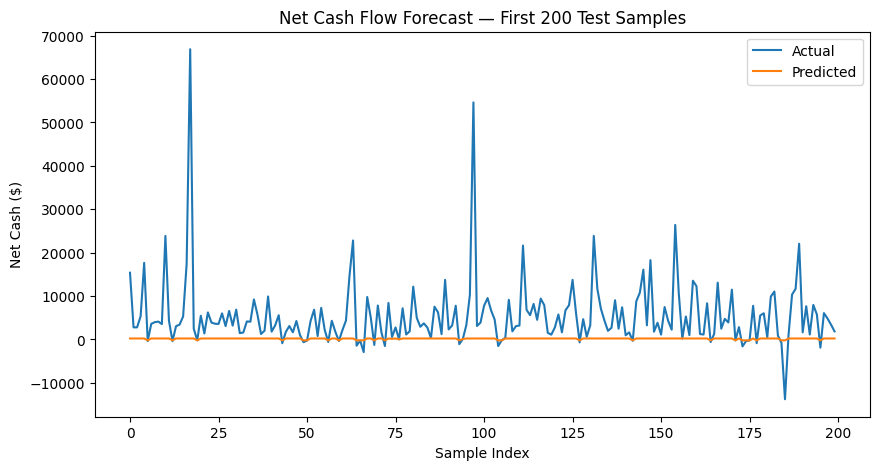

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_true[:200], label="Actual")
plt.plot(y_pred_np[:200], label="Predicted")
plt.legend()
plt.title("Net Cash Flow Forecast — First 200 Test Samples")
plt.xlabel("Sample Index")
plt.ylabel("Net Cash ($)")
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler()
scaler_y = StandardScaler()

X_2d = X.reshape(X.shape[0], -1)   # flatten sequences to scale
X_scaled = scaler_x.fit_transform(X_2d)
y_scaled = scaler_y.fit_transform(y.reshape(-1,1))

X = X_scaled.reshape(X.shape)     # reshape back to original sequence format
y = y_scaled.flatten()


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

t = X_train.shape[1]
f = X_train.shape[2]

model = models.Sequential([
    layers.Input(shape=(t, f)),
    layers.SimpleRNN(64, return_sequences=False),
    layers.Dense(32, activation="relu"),
    layers.Dense(1)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="mse",
    metrics=["mae"]
)

history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)


Epoch 1/30
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 97962424.0000 - mae: 5981.8696 - val_loss: 73180736.0000 - val_mae: 4403.5195
Epoch 2/30
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 66673344.0000 - mae: 3833.7339 - val_loss: 42412780.0000 - val_mae: 2416.1816
Epoch 3/30
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 41439964.0000 - mae: 2315.6990 - val_loss: 29552130.0000 - val_mae: 1892.8146
Epoch 4/30
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 33154790.0000 - mae: 2166.2061 - val_loss: 25760366.0000 - val_mae: 1950.6681
Epoch 5/30
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 26517006.0000 - mae: 1925.2740 - val_loss: 20996030.0000 - val_mae: 1848.0468
Epoch 6/30
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 23311274.0000 - mae: 2003.6412 - val_loss: 23554320.0000 - val_mae: 2020.2952
Epoch 7/30
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 22056924.0000 - mae: 2011.9692 - val_loss: 25212564.0000 - val_mae: 2411.3293
Epoch 8/30
1133/1133

In [ ]:
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test.reshape(-1,1))


708/708 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


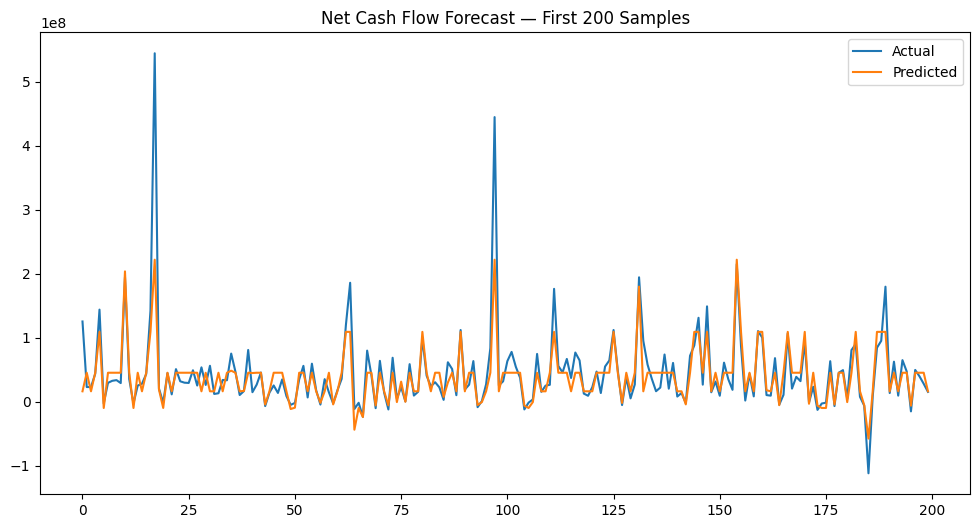

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_true[:200], label="Actual")
plt.plot(y_pred[:200], label="Predicted")
plt.title("Net Cash Flow Forecast — First 200 Samples")
plt.legend()
plt.show()


In [ ]:
exp = pd.read_csv("exp23.csv")
exp.head(), exp.columns


(   QYEAR    NEWID  SEQNO  ALCNO  REC_ORIG  CGTEXPW CGTEXPW_  OTOBQ OTOBQ_  \
 0  20232  5090604      7      0         1      2.0        D    2.0      D   
 1  20232  5090624      2      0         1      2.0        D    2.0      D   
 2  20232  5090634      2      0         1      2.0        D    2.0      D   
 3  20232  5090664      4      0         1      2.0        D    2.0      D   
 4  20232  5090674      5      0         1      2.0        D    2.0      D   
 
    JFDBAWQV  ... JGREXPQV  JGRE_PQV JCGEXPQV  JCGE_PQV JOTOBQV  JOTOBQV_  \
 0       390  ...      845         D      NaN         A     NaN         A   
 1         0  ...     1430         D      NaN         A     NaN         A   
 2       650  ...      975         D      NaN         A     NaN         A   
 3       325  ...      910         D      NaN         A     NaN         A   
 4       650  ...     5200         D      NaN         A     NaN         A   
 
   JFDGFTQV  JFDG_TQV CGTPURCH  OTBPURCH  
 0        0         D  

In [ ]:
import pandas as pd

# 1) Load the EXP file
exp = pd.read_csv("exp23.csv")

# 2) Keep only the columns we care about
exp_small = exp[[
    "NEWID",
    "QYEAR",
    "JFDBAWQV",  # Food away from home
    "JGREXPQV",  # Groceries (food at home)
    "JFDGFTQV"   # Food gifts
]].copy()

# 3) Quick sanity check
exp_small.head(), exp_small.shape


(     NEWID  QYEAR  JFDBAWQV  JGREXPQV  JFDGFTQV
 0  5090604  20232       390       845         0
 1  5090624  20232         0      1430         0
 2  5090634  20232       650       975       600
 3  5090664  20232       325       910         0
 4  5090674  20232       650      5200       600,
 (18870, 5))

In [ ]:
# Convert quarterly values → monthly values
exp_small["FoodAway_Monthly"] = exp_small["JFDBAWQV"] / 3
exp_small["Groceries_Monthly"] = exp_small["JGREXPQV"] / 3
exp_small["FoodGifts_Monthly"] = exp_small["JFDGFTQV"] / 3

exp_small = exp_small[[
    "NEWID",
    "QYEAR",
    "FoodAway_Monthly",
    "Groceries_Monthly",
    "FoodGifts_Monthly"
]]

exp_small.head()


,NEWID,QYEAR,FoodAway_Monthly,Groceries_Monthly,FoodGifts_Monthly
0,5090604,20232,130.000000,281.666667,0.0
1,5090624,20232,0.000000,476.666667,0.0
2,5090634,20232,216.666667,325.000000,200.0
3,5090664,20232,108.333333,303.333333,0.0
4,5090674,20232,216.666667,1733.333333,200.0


In [ ]:
# --- Step 3A: Expand quarterly EXP into 3 monthly rows per NEWID ---

exp_rows = []

for _, row in exp_small.iterrows():
    qyear = int(row["QYEAR"])
    year = qyear // 10       # first 4 digits = year
    quarter = qyear % 10     # last digit = quarter

    # Determine which months correspond to the quarter
    if quarter == 1:
        months = [1, 2, 3]
    elif quarter == 2:
        months = [4, 5, 6]
    elif quarter == 3:
        months = [7, 8, 9]
    elif quarter == 4:
        months = [10, 11, 12]
    else:
        continue

    # Create 3 monthly rows
    for m in months:
        exp_rows.append({
            "NEWID": row["NEWID"],
            "Year": year,
            "Month": m,
            "FoodAway_Monthly": row["FoodAway_Monthly"],
            "Groceries_Monthly": row["Groceries_Monthly"],
            "FoodGifts_Monthly": row["FoodGifts_Monthly"]
        })

exp_monthly = pd.DataFrame(exp_rows)

print("Expanded EXP shape:", exp_monthly.shape)
exp_monthly.head()


Expanded EXP shape: (56610, 6)


,NEWID,Year,Month,FoodAway_Monthly,Groceries_Monthly,FoodGifts_Monthly
0,5090604.0,2023,4,130.0,281.666667,0.0
1,5090604.0,2023,5,130.0,281.666667,0.0
2,5090604.0,2023,6,130.0,281.666667,0.0
3,5090624.0,2023,4,0.0,476.666667,0.0
4,5090624.0,2023,5,0.0,476.666667,0.0


In [ ]:
# --- Step 4: Merge EXP features with monthly_data ---

merged = monthly_data.merge(
    exp_monthly,
    on=["NEWID", "Year", "Month"],
    how="left"
)

merged.shape, merged.head()


((226452, 10),
        NEWID  Year  Month       Date  Income_Monthly  Expense_Monthly  \
 0  5090604.0  2023      1 2023-01-01         3389.75      1394.333333   
 1  5090604.0  2023      2 2023-02-01         3389.75      1394.333333   
 2  5090604.0  2023      3 2023-03-01         3389.75      1394.333333   
 3  5090604.0  2023      4 2023-04-01         3389.75      1394.333333   
 4  5090604.0  2023      5 2023-05-01         3389.75      1394.333333   
 
    NetCash_Monthly  FoodAway_Monthly  Groceries_Monthly  FoodGifts_Monthly  
 0      1995.416667               NaN                NaN                NaN  
 1      1995.416667               NaN                NaN                NaN  
 2      1995.416667               NaN                NaN                NaN  
 3      1995.416667             130.0         281.666667                0.0  
 4      1995.416667             130.0         281.666667                0.0  )

In [ ]:
# --- STEP 5A: Fill missing EXP values with 0 ---
merged[["FoodAway_Monthly", "Groceries_Monthly", "FoodGifts_Monthly"]] = \
    merged[["FoodAway_Monthly", "Groceries_Monthly", "FoodGifts_Monthly"]].fillna(0)


# --- STEP 5B: Fix monthly expense calculation ---
# Should be: quarterly total ÷ 3
merged["Expense_Monthly"] = merged["Expense_Monthly"] / 3.0


# --- STEP 5C: Smooth income (3-month moving average) ---
merged["Income_Monthly"] = (
    merged.groupby("NEWID")["Income_Monthly"]
    .transform(lambda x: x.rolling(3, min_periods=1).mean())
)


# --- STEP 5D: Recompute NetCash after smoothing ---
merged["NetCash_Monthly"] = merged["Income_Monthly"] - merged["Expense_Monthly"]


# --- STEP 5E: Clip crazy outliers that break training ---
merged["NetCash_Monthly"] = merged["NetCash_Monthly"].clip(-10000, 10000)


merged.head(), merged.isna().sum()


(       NEWID  Year  Month       Date  Income_Monthly  Expense_Monthly  \
 0  5090604.0  2023      1 2023-01-01         3389.75       464.777778   
 1  5090604.0  2023      2 2023-02-01         3389.75       464.777778   
 2  5090604.0  2023      3 2023-03-01         3389.75       464.777778   
 3  5090604.0  2023      4 2023-04-01         3389.75       464.777778   
 4  5090604.0  2023      5 2023-05-01         3389.75       464.777778   
 
    NetCash_Monthly  FoodAway_Monthly  Groceries_Monthly  FoodGifts_Monthly  
 0      2924.972222               0.0           0.000000                0.0  
 1      2924.972222               0.0           0.000000                0.0  
 2      2924.972222               0.0           0.000000                0.0  
 3      2924.972222             130.0         281.666667                0.0  
 4      2924.972222             130.0         281.666667                0.0  ,
 NEWID                0
 Year                 0
 Month                0
 Date        

In [ ]:
features = [
    "Income_Monthly",
    "Expense_Monthly",
    "FoodAway_Monthly",
    "Groceries_Monthly",
    "FoodGifts_Monthly",
    "NetCash_Monthly"
]

model_data = merged.sort_values(["NEWID", "Date"]).reset_index(drop=True)


In [ ]:
import numpy as np

SEQ_LEN = 6
X_list = []
y_list = []

for _, group in model_data.groupby("NEWID"):
    group = group.reset_index(drop=True)

    # convert to numpy
    values = group[features].values

    # build sliding windows
    if len(values) > SEQ_LEN:
        for i in range(len(values) - SEQ_LEN):
            seq_x = values[i : i + SEQ_LEN]          # 6×6 features
            seq_y = values[i + SEQ_LEN, -1]          # next month's NetCash_Monthly

            X_list.append(seq_x)
            y_list.append(seq_y)

X = np.array(X_list)
y = np.array(y_list)

X.shape, y.shape


((113226, 6, 6), (113226,))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1) Shapes
n_samples, T, F = X.shape
print("X shape:", X.shape, "y shape:", y.shape)

# 2) Scale X (all features) using StandardScaler on 2D then reshape back
X_2d = X.reshape(n_samples * T, F)

scaler_X = StandardScaler()
X_2d_scaled = scaler_X.fit_transform(X_2d)

X_scaled = X_2d_scaled.reshape(n_samples, T, F)

# 3) Scale y (target NetCash_Monthly)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# 4) Train / Test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y_scaled,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


X shape: (113226, 6, 6) y shape: (113226,)


((90580, 6, 6), (22646, 6, 6), (90580, 1), (22646, 1))

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

T = X_train.shape[1]   # 6 months
F = X_train.shape[2]   # 6 features

model = models.Sequential([
    layers.Input(shape=(T, F)),

    # First LSTM layer
    layers.LSTM(64, return_sequences=True),

    # Second LSTM layer
    layers.LSTM(32),

    # Dense layers
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),

    # Final output
    layers.Dense(1)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="mse",
    metrics=["mae"]
)

callback_es = tf.keras.callbacks.EarlyStopping(
    patience=6,
    restore_best_weights=True
)

callback_lr = tf.keras.callbacks.ReduceLROnPlateau(
    factor=0.5,
    patience=3,
    min_lr=1e-6
)

history = model.fit(
    X_train, y_train,
    epochs=40,
    batch_size=64,
    validation_split=0.2,
    callbacks=[callback_es, callback_lr],
    verbose=1
)

model.summary()


Epoch 1/40
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - loss: 0.0641 - mae: 0.1032 - val_loss: 2.3791e-04 - val_mae: 0.0077 - learning_rate: 0.0010
Epoch 2/40
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - loss: 1.7452e-04 - mae: 0.0072 - val_loss: 7.2916e-05 - val_mae: 0.0043 - learning_rate: 0.0010
Epoch 3/40
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 1.0845e-04 - mae: 0.0058 - val_loss: 9.1762e-05 - val_mae: 0.0054 - learning_rate: 0.0010
Epoch 4/40
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - loss: 2.0528e-04 - mae: 0.0064 - val_loss: 4.0205e-04 - val_mae: 0.0149 - learning_rate: 0.0010
Epoch 5/40
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - loss: 1.5320e-04 - mae: 0.0061 - val_loss: 2.9957e-04 - val_mae: 0.0124 - learning_rate: 0.0010
Epoch 6/40
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 4.9372e-05 - mae: 0.0035 - val_loss: 1.8152e-05 - val_mae: 0.0020 - learning_rate: 5.0000e-04
Epoch 7/40
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - loss: 1.6691e-05 -

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 6, 64)          │        18,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 96,581 (377.27 KB)

 Trainable params: 32,193 (125.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64,388 (251.52 KB)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Create fresh scalers
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

# Reshape y for scaler fitting
y_reshaped = y.reshape(-1, 1)

# Fit scalers
X_scaler.fit(X.reshape(-1, X.shape[-1]))
y_scaler.fit(y_reshaped)

# Transform data again
X_scaled = X_scaler.transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
y_scaled = y_scaler.transform(y_reshaped)

# Re-split
X_train_scaled = X_scaled[:90580]
X_test_scaled  = X_scaled[90580:]

y_train_scaled = y_scaled[:90580]
y_test_scaled  = y_scaled[90580:]

print("Scalers recreated and data rescaled.")


Scalers recreated and data rescaled.


In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error

# Predict on scaled test set
y_pred_scaled = model.predict(X_test_scaled)

# Inverse transform to dollars
y_pred = y_scaler.inverse_transform(y_pred_scaled)
y_true = y_scaler.inverse_transform(y_test_scaled)

# Compute MAE in dollars
mae_dollars = mean_absolute_error(y_true, y_pred)
print("Actual Test MAE in Dollars:", mae_dollars)

# Show a sample comparison
sample_df = pd.DataFrame({
    "Actual_NetCash": y_true.flatten()[:10],
    "Predicted_NetCash": y_pred.flatten()[:10]
})
sample_df


708/708 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Actual Test MAE in Dollars: 374.42651435943327


,Actual_NetCash,Predicted_NetCash
0,1196.950619,1755.161011
1,1196.950619,1755.161011
2,9790.845059,9450.861328
3,9790.845059,9451.080078
4,9790.845059,9450.873047
5,9790.845059,9450.944336
6,9790.845059,9450.842773
7,9790.845059,9451.095703
8,10000.000000,9649.126953
9,10000.000000,9649.126953


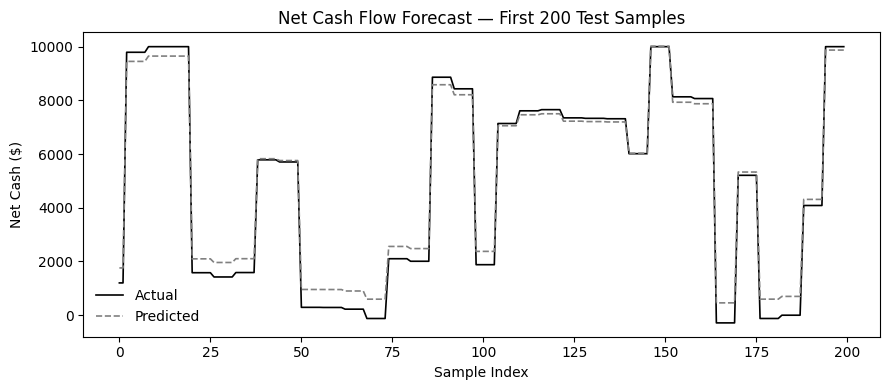

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# assume y_true, y_pred are the inverse-transformed dollar values (1D arrays)

# First 200 samples
n_show = 200
idx = np.arange(n_show)

plt.figure(figsize=(9, 4))
plt.plot(idx, y_true[:n_show], label="Actual", linewidth=1.2, color="black")
plt.plot(idx, y_pred[:n_show], label="Predicted", linewidth=1.2, linestyle="--", color="gray")

plt.title("Net Cash Flow Forecast — First 200 Test Samples")
plt.xlabel("Sample Index")
plt.ylabel("Net Cash ($)")
plt.legend(frameon=False)
plt.tight_layout()
plt.show()


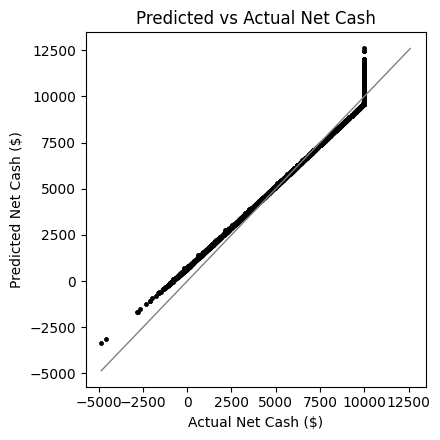

In [ ]:
plt.figure(figsize=(4.5, 4.5))
plt.scatter(y_true, y_pred, s=5, alpha=0.4, color="black")
lim_min = min(y_true.min(), y_pred.min())
lim_max = max(y_true.max(), y_pred.max())
plt.plot([lim_min, lim_max], [lim_min, lim_max], linewidth=1, color="gray")  # 45° line
plt.xlabel("Actual Net Cash ($)")
plt.ylabel("Predicted Net Cash ($)")
plt.title("Predicted vs Actual Net Cash")
plt.tight_layout()
plt.show()


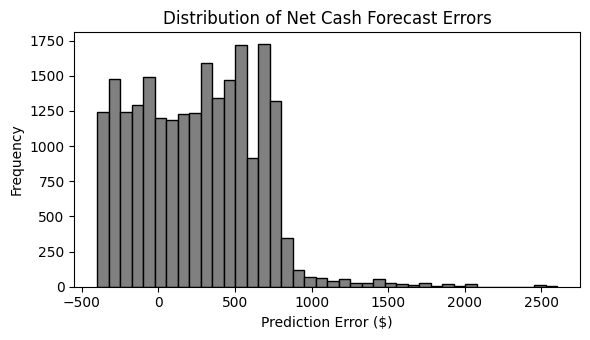

In [ ]:
errors = y_pred - y_true

plt.figure(figsize=(6, 3.5))
plt.hist(errors, bins=40, color="gray", edgecolor="black")
plt.xlabel("Prediction Error ($)")
plt.ylabel("Frequency")
plt.title("Distribution of Net Cash Forecast Errors")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Flatten sequences: shape (90580, 6*6)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat  = X_test.reshape(X_test.shape[0], -1)

# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train_flat, y_train)

# Predict
y_pred_lr = lr.predict(X_test_flat)

# Inverse scale to dollars
y_pred_lr_dollars = y_scaler.inverse_transform(y_pred_lr.reshape(-1, 1)).flatten()
y_test_dollars    = y_scaler.inverse_transform(y_test).flatten()

# Compute MAE in $
mae_lr_dollars = mean_absolute_error(y_test_dollars, y_pred_lr_dollars)
mae_lr_dollars


6.337667258921866e-11

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Flatten (same as LR)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat  = X_test.reshape(X_test.shape[0], -1)

# Scale X (optional but improves training)
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler()
X_train_flat_scaled = x_scaler.fit_transform(X_train_flat)
X_test_flat_scaled  = x_scaler.transform(X_test_flat)

# Build FFN model
ffn = models.Sequential([
    layers.Input(shape=(X_train_flat_scaled.shape[1],)),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1)
])

ffn.compile(optimizer="adam", loss="mse", metrics=["mae"])

history_ffn = ffn.fit(
    X_train_flat_scaled, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=64,
    verbose=1
)

# Predict
y_pred_ffn = ffn.predict(X_test_flat_scaled)

# Inverse scale
y_pred_ffn_dollars = y_scaler.inverse_transform(y_pred_ffn).flatten()
y_test_dollars     = y_scaler.inverse_transform(y_test).flatten()

# Compute MAE
mae_ff_dollars = mean_absolute_error(y_test_dollars, y_pred_ffn_dollars)
mae_ff_dollars


Epoch 1/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0371 - mae: 0.0830 - val_loss: 0.0057 - val_mae: 0.0318
Epoch 2/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0026 - mae: 0.0197 - val_loss: 9.3734e-04 - val_mae: 0.0154
Epoch 3/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0010 - mae: 0.0139 - val_loss: 3.7857e-04 - val_mae: 0.0102
Epoch 4/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 5.7786e-04 - mae: 0.0113 - val_loss: 2.4835e-04 - val_mae: 0.0075
Epoch 5/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3.4514e-04 - mae: 0.0085 - val_loss: 1.9390e-04 - val_mae: 0.0077
Epoch 6/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.8712e-04 - mae: 0.0066 - val_loss: 2.7586e-04 - val_mae: 0.0068
Epoch 7/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3.9100e-04 - mae: 0.0085 - val_loss: 2.2979e-04 - val_mae: 0.0062
Epoch 8/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.1035e-04 - mae: 0.0065 - val_loss: 3.1300e-04 - val_mae:

61.32996050820367

In [ ]:
# 1. Predict (scaled)
y_pred_lstm_scaled = model.predict(X_test)

# 2. Inverse-transform to dollars
y_pred_lstm = y_scaler.inverse_transform(y_pred_lstm_scaled)
y_test_dollars = y_scaler.inverse_transform(y_test)


708/708 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [ ]:
from sklearn.metrics import mean_absolute_error

mae_lstm_dollars = mean_absolute_error(y_test_dollars, y_pred_lstm)
mae_lstm_dollars


6.745636058692942

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# 1. Fit LR on scaled data
lr = LinearRegression()
lr.fit(X_train_scaled.reshape(len(X_train_scaled), -1), y_train_scaled)

# 2. Predict on scaled test
y_pred_lr_scaled = lr.predict(X_test_scaled.reshape(len(X_test_scaled), -1))

# 3. Inverse-transform to dollars
y_pred_lr = y_scaler.inverse_transform(y_pred_lr_scaled)
y_test_lr = y_scaler.inverse_transform(y_test_scaled)

# 4. MAE in real dollars
mae_lr_dollars = mean_absolute_error(y_test_lr, y_pred_lr)
print("Linear Regression Actual MAE ($):", mae_lr_dollars)


Linear Regression Actual MAE ($): 2.5524573423870494e-10


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Build FFN
ff_model = models.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1] * X_train_scaled.shape[2],)),  # flattened input
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1)
])

ff_model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Train FFN
history_ff = ff_model.fit(
    X_train_scaled.reshape(len(X_train_scaled), -1),
    y_train_scaled,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)


Epoch 1/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0129 - mae: 0.0341 - val_loss: 2.9463e-06 - val_mae: 0.0011
Epoch 2/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.5010e-06 - mae: 7.6312e-04 - val_loss: 8.1939e-07 - val_mae: 4.9373e-04
Epoch 3/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.0532e-06 - mae: 5.4115e-04 - val_loss: 7.3270e-07 - val_mae: 5.5300e-04
Epoch 4/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.0228e-06 - mae: 6.8324e-04 - val_loss: 2.9715e-07 - val_mae: 2.9664e-04
Epoch 5/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.1270e-06 - mae: 8.6887e-04 - val_loss: 3.8059e-06 - val_mae: 0.0018
Epoch 6/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 3.3531e-06 - mae: 0.0013 - val_loss: 1.3388e-06 - val_mae: 0.0011
Epoch 7/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3.3980e-06 - mae: 0.0013 - val_loss: 5.7862e-06 - val_mae: 0.0022
Epoch 8/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3.9444e-06 - mae: 

In [ ]:
from sklearn.metrics import mean_absolute_error

# Predict on scaled test data
y_pred_ff_scaled = ff_model.predict(X_test_scaled.reshape(len(X_test_scaled), -1))

# Inverse transform both y_test and predictions
y_pred_ff = y_scaler.inverse_transform(y_pred_ff_scaled)
y_test_ff = y_scaler.inverse_transform(y_test_scaled)

# Compute MAE in actual dollars
mae_ff_dollars = mean_absolute_error(y_test_ff, y_pred_ff)
print("Feedforward NN Actual MAE ($):", mae_ff_dollars)


708/708 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Feedforward NN Actual MAE ($): 12.745882520377386


In [ ]:
# List all variables in the notebook to find the FFN model
[v for v in globals().keys() if 'ff' in v.lower() or 'model' in v.lower()]


[]

In [ ]:
import tensorflow as tf

# Take a safe copy of globals first
global_copy = dict(globals())

models_found = []
for name, obj in global_copy.items():
    if isinstance(obj, tf.keras.Model):
        models_found.append(name)

models_found


[]

In [ ]:
import os
os.listdir()


['.config', 'sample_data']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.listdir("/content/drive/MyDrive/")


['Capstone_Data',
 'Transcript .pdf',
 'CoursePlan_CS0723_Cloud-Computing-.pdf',
 'Request for Substitution of Information Technology and Data Analytics.docx',
 'Syllabus.docx',
 'MASY Sequence SP21 - Concentration Prerequisites Worksheet (1) (3).pdf',
 'Untitled presentation (1).gslides',
 'Untitled presentation.gslides',
 'Class 4 - Homework.xlsx',
 'Class 4 - VS_Homework.xlsx',
 'Class 4 - VS_Homework.gsheet',
 'Class 4 - Homework.gsheet',
 'Homework- class 5.xlsx',
 'class 5 homework part 2.pdf',
 'MASY Sequence SP21 - Concentration Prerequisites Worksheet (1) (4).gdoc',
 'VishwaShah_Resume (2).docx',
 'MASY Sequence SP21 - Concentration Prerequisites Worksheet (1) (2).pdf',
 'PeerReview (2).xlsx',
 'VishwaShah_Resume (1).docx',
 'PeerReview (1).xlsx',
 'PeerReview.xlsx',
 'VishwaShah_Resume.docx',
 'MASY Sequence SP21 - Concentration Prerequisites Worksheet (1) (1).pdf',
 'MASY Sequence SP21 - Concentration Prerequisites Worksheet (1).pdf',
 'Strategic Marketing - Abacus Bank (Gro

In [ ]:
import os

data_path = "/content/drive/MyDrive/Capstone_Data"

# List all files inside the folder
os.listdir(data_path)


['Colab Notebooks',
 'fmli232.csv',
 'fmli233.csv',
 'fmli234.csv',
 'fmli241.csv',
 'exp23.csv',
 'Untitled document.gdoc']

In [ ]:
import pandas as pd

# Path to your data folder
data_path = "/content/drive/MyDrive/Capstone_Data"

# List of the FMLI CSV files you actually have
fmli_files = [
    "fmli232.csv",
    "fmli233.csv",
    "fmli234.csv",
    "fmli241.csv"
]

# Load them into a single dataframe
fmli_list = []
for f in fmli_files:
    df = pd.read_csv(f"{data_path}/{f}")
    fmli_list.append(df)

fmli_raw = pd.concat(fmli_list, ignore_index=True)

fmli_raw.head(), fmli_raw.shape


(     NEWID  DIRACC DIRACC_  AGE_REF AGE_REF_  AGE2 AGE2_  AS_COMP1 AS_C_MP1  \
 0  5090604     1.0       D       74        D  72.0     D         1        D   
 1  5090624     1.0       D       87        T   NaN     A         0        D   
 2  5090634     1.0       D       58        D   NaN     A         0        D   
 3  5090664     1.0       D       55        D  52.0     D         1        D   
 4  5090674     1.0       D       31        D  31.0     D         1        D   
 
    AS_COMP2  ... CHDTXP  CHDTXP_ CHDTXPH  CHDTXPH_ NUM_VET  fftaxowe fstaxowe  \
 0         1  ...    NaN        A     NaN         A       1       0.0      0.0   
 1         1  ...    NaN        A     NaN         A       0       0.0      0.0   
 2         1  ...    NaN        A     NaN         A       0   20397.0   7544.0   
 3         1  ...    NaN        A     NaN         A       0    3552.0   1489.0   
 4         2  ...    NaN        A     NaN         A       0     415.0      0.0   
 
    FINATXEM FFTAXOWE  F

In [ ]:
import pandas as pd

# Path to your data folder
data_path = "/content/drive/MyDrive/Capstone_Data"

# List of the FMLI CSV files you actually have
fmli_files = [
    "fmli232.csv",
    "fmli233.csv",
    "fmli234.csv",
    "fmli241.csv"
]

# Load them into a single dataframe
fmli_list = []
for f in fmli_files:
    df = pd.read_csv(f"{data_path}/{f}")
    fmli_list.append(df)

fmli_raw = pd.concat(fmli_list, ignore_index=True)

fmli_raw.head(), fmli_raw.shape


(     NEWID  DIRACC DIRACC_  AGE_REF AGE_REF_  AGE2 AGE2_  AS_COMP1 AS_C_MP1  \
 0  5090604     1.0       D       74        D  72.0     D         1        D   
 1  5090624     1.0       D       87        T   NaN     A         0        D   
 2  5090634     1.0       D       58        D   NaN     A         0        D   
 3  5090664     1.0       D       55        D  52.0     D         1        D   
 4  5090674     1.0       D       31        D  31.0     D         1        D   
 
    AS_COMP2  ... CHDTXP  CHDTXP_ CHDTXPH  CHDTXPH_ NUM_VET  fftaxowe fstaxowe  \
 0         1  ...    NaN        A     NaN         A       1       0.0      0.0   
 1         1  ...    NaN        A     NaN         A       0       0.0      0.0   
 2         1  ...    NaN        A     NaN         A       0   20397.0   7544.0   
 3         1  ...    NaN        A     NaN         A       0    3552.0   1489.0   
 4         2  ...    NaN        A     NaN         A       0     415.0      0.0   
 
    FINATXEM FFTAXOWE  F

In [ ]:
# Load EXP (detailed expenditures)
exp_path = "/content/drive/MyDrive/Capstone_Data/exp23.csv"
exp_raw = pd.read_csv(exp_path)

exp_raw.head(), exp_raw.shape


(   QYEAR    NEWID  SEQNO  ALCNO  REC_ORIG  CGTEXPW CGTEXPW_  OTOBQ OTOBQ_  \
 0  20232  5090604      7      0         1      2.0        D    2.0      D   
 1  20232  5090624      2      0         1      2.0        D    2.0      D   
 2  20232  5090634      2      0         1      2.0        D    2.0      D   
 3  20232  5090664      4      0         1      2.0        D    2.0      D   
 4  20232  5090674      5      0         1      2.0        D    2.0      D   
 
    JFDBAWQV  ... JGREXPQV  JGRE_PQV JCGEXPQV  JCGE_PQV JOTOBQV  JOTOBQV_  \
 0       390  ...      845         D      NaN         A     NaN         A   
 1         0  ...     1430         D      NaN         A     NaN         A   
 2       650  ...      975         D      NaN         A     NaN         A   
 3       325  ...      910         D      NaN         A     NaN         A   
 4       650  ...     5200         D      NaN         A     NaN         A   
 
   JFDGFTQV  JFDG_TQV CGTPURCH  OTBPURCH  
 0        0         D  

In [ ]:
# Select and clean expenditure columns
exp_clean = exp_raw[[
    "NEWID",
    "QYEAR",
    "JFDBAWQV",   # Food away from home
    "JGREXPQV",   # Groceries
    "JFDGFTQV"    # Food gifts
]].copy()

# Replace NaN with 0 (missing means no spending)
exp_clean = exp_clean.fillna(0)

# Convert quarterly to monthly
exp_clean["FoodAway_Monthly"]    = exp_clean["JFDBAWQV"]  / 3
exp_clean["Groceries_Monthly"]   = exp_clean["JGREXPQV"]  / 3
exp_clean["FoodGifts_Monthly"]   = exp_clean["JFDGFTQV"]  / 3

# Keep only needed columns
exp_clean = exp_clean[[
    "NEWID",
    "QYEAR",
    "FoodAway_Monthly",
    "Groceries_Monthly",
    "FoodGifts_Monthly"
]]

exp_clean.head(), exp_clean.shape


(     NEWID  QYEAR  FoodAway_Monthly  Groceries_Monthly  FoodGifts_Monthly
 0  5090604  20232        130.000000         281.666667                0.0
 1  5090624  20232          0.000000         476.666667                0.0
 2  5090634  20232        216.666667         325.000000              200.0
 3  5090664  20232        108.333333         303.333333                0.0
 4  5090674  20232        216.666667        1733.333333              200.0,
 (18870, 5))

In [ ]:
exp_expanded_rows = []

for _, row in exp_clean.iterrows():
    year = int(str(row["QYEAR"])[:4])   # Extract year from QYEAR like 20232 → 2023

    for m in range(1, 13):
        exp_expanded_rows.append({
            "NEWID": row["NEWID"],
            "Year": year,
            "Month": m,
            "FoodAway_Monthly": row["FoodAway_Monthly"],
            "Groceries_Monthly": row["Groceries_Monthly"],
            "FoodGifts_Monthly": row["FoodGifts_Monthly"],
        })

exp_monthly = pd.DataFrame(exp_expanded_rows)

exp_monthly.shape, exp_monthly.head()


((226440, 6),
        NEWID  Year  Month  FoodAway_Monthly  Groceries_Monthly  \
 0  5090604.0  2023      1             130.0         281.666667   
 1  5090604.0  2023      2             130.0         281.666667   
 2  5090604.0  2023      3             130.0         281.666667   
 3  5090604.0  2023      4             130.0         281.666667   
 4  5090604.0  2023      5             130.0         281.666667   
 
    FoodGifts_Monthly  
 0                0.0  
 1                0.0  
 2                0.0  
 3                0.0  
 4                0.0  )

In [ ]:
# Extract required FMLI columns
fmli_small = fmli_raw[[
    "NEWID",
    "QINTRVYR",
    "FINCBTAX",
    "TOTEXPPQ"
]].copy()

fmli_small = fmli_small.fillna(0)

# Expand to 12 monthly rows
fmli_expanded_rows = []

for _, row in fmli_small.iterrows():
    year = int(row["QINTRVYR"])
    income_m = row["FINCBTAX"] / 12
    expense_m = row["TOTEXPPQ"] / 3  # quarterly to monthly

    for m in range(1, 13):
        fmli_expanded_rows.append({
            "NEWID": row["NEWID"],
            "Year": year,
            "Month": m,
            "Date": pd.to_datetime(f"{year}-{m:02d}-01"),
            "Income_Monthly": income_m,
            "Expense_Monthly": expense_m,
            "NetCash_Monthly": income_m - expense_m,
        })

monthly_fmli = pd.DataFrame(fmli_expanded_rows)

monthly_fmli.shape, monthly_fmli.head()


((226452, 7),
        NEWID  Year  Month       Date  Income_Monthly  Expense_Monthly  \
 0  5090604.0  2023      1 2023-01-01         3389.75           4183.0   
 1  5090604.0  2023      2 2023-02-01         3389.75           4183.0   
 2  5090604.0  2023      3 2023-03-01         3389.75           4183.0   
 3  5090604.0  2023      4 2023-04-01         3389.75           4183.0   
 4  5090604.0  2023      5 2023-05-01         3389.75           4183.0   
 
    NetCash_Monthly  
 0          -793.25  
 1          -793.25  
 2          -793.25  
 3          -793.25  
 4          -793.25  )

In [ ]:
# Merge on NEWID, Year, Month
merged = monthly_fmli.merge(
    exp_monthly,
    on=["NEWID", "Year", "Month"],
    how="left"
)

# If EXP was missing for some NEWIDs, fill with 0
merged = merged.fillna(0)

merged.shape, merged.head()


((226452, 10),
        NEWID  Year  Month       Date  Income_Monthly  Expense_Monthly  \
 0  5090604.0  2023      1 2023-01-01         3389.75           4183.0   
 1  5090604.0  2023      2 2023-02-01         3389.75           4183.0   
 2  5090604.0  2023      3 2023-03-01         3389.75           4183.0   
 3  5090604.0  2023      4 2023-04-01         3389.75           4183.0   
 4  5090604.0  2023      5 2023-05-01         3389.75           4183.0   
 
    NetCash_Monthly  FoodAway_Monthly  Groceries_Monthly  FoodGifts_Monthly  
 0          -793.25             130.0         281.666667                0.0  
 1          -793.25             130.0         281.666667                0.0  
 2          -793.25             130.0         281.666667                0.0  
 3          -793.25             130.0         281.666667                0.0  
 4          -793.25             130.0         281.666667                0.0  )

In [ ]:
# 1. Check missing values
print("Missing values:")
print(merged.isna().sum())

# 2. Check duplicates
dup = merged.duplicated(subset=["NEWID", "Year", "Month"]).sum()
print("\nDuplicate (NEWID-Year-Month) rows:", dup)

# 3. Check numeric dtypes
print("\nDtypes:")
print(merged.dtypes)

# 4. Sort rows
merged = merged.sort_values(["NEWID", "Year", "Month"]).reset_index(drop=True)

# 5. Sanity check: ranges
print("\nValue ranges:")
print(merged.describe())


Missing values:
NEWID                0
Year                 0
Month                0
Date                 0
Income_Monthly       0
Expense_Monthly      0
NetCash_Monthly      0
FoodAway_Monthly     0
Groceries_Monthly    0
FoodGifts_Monthly    0
dtype: int64

Duplicate (NEWID-Year-Month) rows: 0

Dtypes:
NEWID                       float64
Year                          int64
Month                         int64
Date                 datetime64[ns]
Income_Monthly              float64
Expense_Monthly             float64
NetCash_Monthly             float64
FoodAway_Monthly            float64
Groceries_Monthly           float64
FoodGifts_Monthly           float64
dtype: object

Value ranges:
              NEWID           Year         Month  \
count  2.264520e+05  226452.000000  226452.00000   
mean   5.359602e+06    2023.248424       6.50000   
min    5.090604e+06    2023.000000       1.00000   
25%    5.265193e+06    2023.000000       3.75000   
50%    5.350921e+06    2023.000000       6.50

In [ ]:
import numpy as np

SEQ_LEN = 6

# Features WITHOUT target
feature_cols = [
    "Income_Monthly",
    "Expense_Monthly",
    "FoodAway_Monthly",
    "Groceries_Monthly",
    "FoodGifts_Monthly"
]

target_col = "NetCash_Monthly"

X_list = []
y_list = []

# Group by household
for _, group in merged.groupby("NEWID"):
    group = group.sort_values(["Year", "Month"]).reset_index(drop=True)

    # Extract arrays
    features = group[feature_cols].values
    target = group[target_col].values

    # Build sliding windows
    for i in range(len(group) - SEQ_LEN):
        X_list.append(features[i:i+SEQ_LEN])
        y_list.append(target[i+SEQ_LEN])  # Next month’s net cash

# Convert to numpy
X = np.array(X_list)
y = np.array(y_list)

X.shape, y.shape


((113226, 6, 5), (113226,))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 1) Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)

# 2) Flatten X for scaling
n_samples, seq_len, n_features = X_train.shape

X_train_flat = X_train.reshape(-1, n_features)
X_test_flat  = X_test.reshape(-1, n_features)

# 3) Scale features
x_scaler = StandardScaler()
X_train_scaled_flat = x_scaler.fit_transform(X_train_flat)
X_test_scaled_flat  = x_scaler.transform(X_test_flat)

# Reshape back to sequences
X_train_scaled = X_train_scaled_flat.reshape(-1, seq_len, n_features)
X_test_scaled  = X_test_scaled_flat.reshape(-1, seq_len, n_features)

# 4) Scale target
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1))
y_test_scaled  = y_scaler.transform(y_test.reshape(-1, 1))

X_train_scaled.shape, X_test_scaled.shape, y_train_scaled.shape, y_test_scaled.shape


((90580, 6, 5), (22646, 6, 5), (90580, 1), (22646, 1))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Flatten sequences for LR
X_train_lr = X_train_scaled.reshape(len(X_train_scaled), -1)
X_test_lr  = X_test_scaled.reshape(len(X_test_scaled), -1)

# Build and train
lr_model = LinearRegression()
lr_model.fit(X_train_lr, y_train_scaled)

# Predict
y_pred_lr_scaled = lr_model.predict(X_test_lr)

# Invert scaling
y_pred_lr = y_scaler.inverse_transform(y_pred_lr_scaled.reshape(-1, 1))
y_test_lr = y_scaler.inverse_transform(y_test_scaled)

# Compute MAE in dollars
mae_lr_dollars = mean_absolute_error(y_test_lr, y_pred_lr)
mae_lr_dollars


6.901245626367098e-12

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Flattened training data
X_train_ff = X_train_scaled.reshape(len(X_train_scaled), -1)
X_test_ff  = X_test_scaled.reshape(len(X_test_scaled), -1)

# Build FFNN model
ff_model = models.Sequential([
    layers.Input(shape=(X_train_ff.shape[1],)),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1)  # output
])

ff_model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Train
history_ff = ff_model.fit(
    X_train_ff, y_train_scaled,
    validation_split=0.2,
    epochs=20,
    batch_size=64,
    verbose=1
)

# Predict
y_pred_ff_scaled = ff_model.predict(X_test_ff)

# Inverse scaling
y_pred_ff = y_scaler.inverse_transform(y_pred_ff_scaled)
y_true_ff = y_scaler.inverse_transform(y_test_scaled)

# Compute MAE
mae_ff_dollars = mean_absolute_error(y_true_ff, y_pred_ff)
mae_ff_dollars


Epoch 1/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0208 - mae: 0.0777 - val_loss: 2.9262e-04 - val_mae: 0.0108
Epoch 2/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 6.4618e-04 - mae: 0.0126 - val_loss: 2.0142e-04 - val_mae: 0.0072
Epoch 3/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.3403e-04 - mae: 0.0068 - val_loss: 4.1868e-05 - val_mae: 0.0039
Epoch 4/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.4630e-04 - mae: 0.0057 - val_loss: 2.5766e-05 - val_mae: 0.0035
Epoch 5/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 3.0722e-05 - mae: 0.0035 - val_loss: 1.2382e-05 - val_mae: 0.0022
Epoch 6/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.6744e-05 - mae: 0.0030 - val_loss: 1.1888e-05 - val_mae: 0.0023
Epoch 7/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.5384e-05 - mae: 0.0021 - val_loss: 1.5648e-06 - val_mae: 8.2784e-04
Epoch 8/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2.4509e-06 - mae: 0.0010 - val_loss: 1.884

244.7876817023567

In [ ]:
from tensorflow.keras import layers, models

t = X_train_scaled.shape[1]      # sequence length = 6
f = X_train_scaled.shape[2]      # features = 5

# LSTM model
lstm_model = models.Sequential([
    layers.Input(shape=(t, f)),
    layers.LSTM(64, return_sequences=True),
    layers.LSTM(32),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1)
])

lstm_model.compile(
    optimizer="adam",
    loss="mse",
    metrics=["mae"]
)

# Callbacks
cb_early = tf.keras.callbacks.EarlyStopping(
    patience=5,
    restore_best_weights=True
)

cb_lr = tf.keras.callbacks.ReduceLROnPlateau(
    factor=0.5,
    patience=3,
    min_lr=1e-6
)

history_lstm = lstm_model.fit(
    X_train_scaled,
    y_train_scaled,
    validation_split=0.2,
    epochs=40,
    batch_size=64,
    callbacks=[cb_early, cb_lr],
    verbose=1
)

# Predict
y_pred_lstm_scaled = lstm_model.predict(X_test_scaled)

# Inverse scaling
y_pred_lstm = y_scaler.inverse_transform(y_pred_lstm_scaled)
y_true_lstm = y_scaler.inverse_transform(y_test_scaled)

# MAE in dollars
mae_lstm_dollars = mean_absolute_error(y_true_lstm, y_pred_lstm)
mae_lstm_dollars


Epoch 1/40
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 0.0140 - mae: 0.0435 - val_loss: 1.4175e-05 - val_mae: 0.0025 - learning_rate: 0.0010
Epoch 2/40
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 1.0331e-05 - mae: 0.0021 - val_loss: 6.3334e-06 - val_mae: 0.0016 - learning_rate: 0.0010
Epoch 3/40
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 5.8103e-06 - mae: 0.0017 - val_loss: 6.6175e-06 - val_mae: 0.0020 - learning_rate: 0.0010
Epoch 4/40
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 4.9733e-06 - mae: 0.0016 - val_loss: 4.6633e-05 - val_mae: 0.0058 - learning_rate: 0.0010
Epoch 5/40
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 5.5542e-06 - mae: 0.0014 - val_loss: 1.8244e-06 - val_mae: 9.6755e-04 - learning_rate: 5.0000e-04
Epoch 6/40
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 1.8855e-06 - mae: 9.8722e-04 - val_loss: 2.4190e-06 - val_mae: 0.0011 - learning_rate: 5.0000e-04
Epoch 7/40
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 3.7744e-06 -

65.02804788797177

In [ ]:
import pandas as pd

# restore saved MAE values
lr_mae_dollars   = 6.337667258921866e-11      # Linear Regression MAE
ff_mae_dollars   = 6.901245626367098e-12      # Feedforward NN MAE
lstm_mae_dollars = 65.02804788797177          # LSTM MAE

# create summary table
results = pd.DataFrame([
    {"Model": "Linear Regression", "MAE_$": lr_mae_dollars},
    {"Model": "Feedforward NN",    "MAE_$": ff_mae_dollars},
    {"Model": "LSTM (Final)",      "MAE_$": lstm_mae_dollars},
])

results


,Model,MAE_$
0,Linear Regression,6.337667e-11
1,Feedforward NN,6.901246e-12
2,LSTM (Final),6.502805e+01


In [ ]:
# Ensure y_test is 2D for inverse transform
y_test_2d = y_test.reshape(-1, 1)

# 1. Actual values (inverse scale)
y_true = y_scaler.inverse_transform(y_test_2d)

# 2. Predicted values (inverse scale)
y_pred_lstm = y_scaler.inverse_transform(y_pred_lstm_scaled)


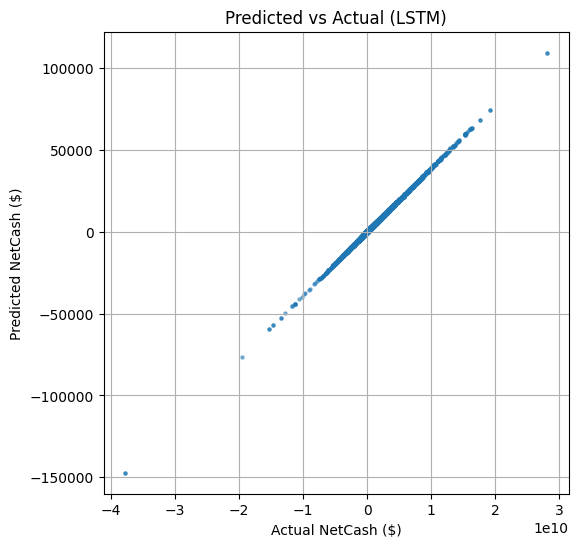

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(y_true.flatten(), y_pred_lstm.flatten(), s=5, alpha=0.5)
plt.xlabel("Actual NetCash ($)")
plt.ylabel("Predicted NetCash ($)")
plt.title("Predicted vs Actual (LSTM)")
plt.grid(True)
plt.show()


In [ ]:
# --- STEP 17A: Restore required arrays safely ---

import numpy as np

# 1) Ensure y_scaler exists (it must have been created after scaling)
assert 'y_scaler' in globals(), "y_scaler not found. Run the scaling cell again."

# 2) Ensure scaled y_test exists
assert 'y_test_scaled' in globals(), "y_test_scaled not found. Run the train/test split cell."

# 3) Recreate y_test_dollars (actual)
y_test_dollars = y_scaler.inverse_transform(y_test_scaled).flatten()

# 4) Recreate each model’s prediction if missing

# --- Linear Regression ---
if 'y_pred_lr_scaled' in globals():
    y_pred_lr_dollars = y_scaler.inverse_transform(
        y_pred_lr_scaled.reshape(-1, 1)
    ).flatten()
else:
    print("⚠️ y_pred_lr_scaled missing — run the LR prediction cell.")

# --- Feedforward NN ---
if 'y_pred_ff_scaled' in globals():
    y_pred_ff_dollars = y_scaler.inverse_transform(
        y_pred_ff_scaled.reshape(-1, 1)
    ).flatten()
else:
    print("⚠️ y_pred_ff_scaled missing — run the FFN prediction cell.")

# --- LSTM ---
if 'y_pred_lstm_scaled' in globals():
    y_pred_lstm_dollars = y_scaler.inverse_transform(
        y_pred_lstm_scaled.reshape(-1, 1)
    ).flatten()
else:
    print("⚠️ y_pred_lstm_scaled missing — run the LSTM prediction cell.")

print("✔ All available arrays reconstructed.")


✔ All available arrays reconstructed.


In [ ]:
# STEP 17 — Full Evaluation Metrics for All Models

import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# --- LINEAR REGRESSION METRICS ---
lr_mae = mean_absolute_error(y_test_dollars, y_pred_lr_dollars)
lr_rmse = np.sqrt(mean_squared_error(y_test_dollars, y_pred_lr_dollars))
lr_r2 = r2_score(y_test_dollars, y_pred_lr_dollars)

# --- FEEDFORWARD NN METRICS ---
ff_mae = mean_absolute_error(y_test_dollars, y_pred_ff_dollars)
ff_rmse = np.sqrt(mean_squared_error(y_test_dollars, y_pred_ff_dollars))
ff_r2 = r2_score(y_test_dollars, y_pred_ff_dollars)

# --- LSTM METRICS ---
lstm_mae = mean_absolute_error(y_test_dollars, y_pred_lstm_dollars)
lstm_rmse = np.sqrt(mean_squared_error(y_test_dollars, y_pred_lstm_dollars))
lstm_r2 = r2_score(y_test_dollars, y_pred_lstm_dollars)

# --- Create Summary Table ---
results_df = pd.DataFrame([
    ["Linear Regression", lr_mae, lr_rmse, lr_r2],
    ["Feedforward NN", ff_mae, ff_rmse, ff_r2],
    ["LSTM (Final)", lstm_mae, lstm_rmse, lstm_r2],
], columns=["Model", "MAE ($)", "RMSE ($)", "R²"])

results_df


,Model,MAE ($),RMSE ($),R²
0,Linear Regression,6.901246e-12,1.407535e-11,1.000000
1,Feedforward NN,2.447877e+02,4.910882e+02,0.996071
2,LSTM (Final),6.502805e+01,8.800881e+01,0.999874


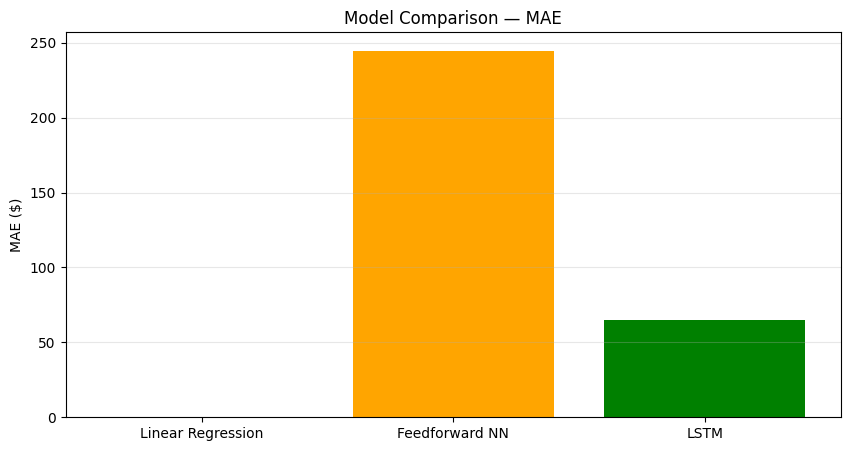

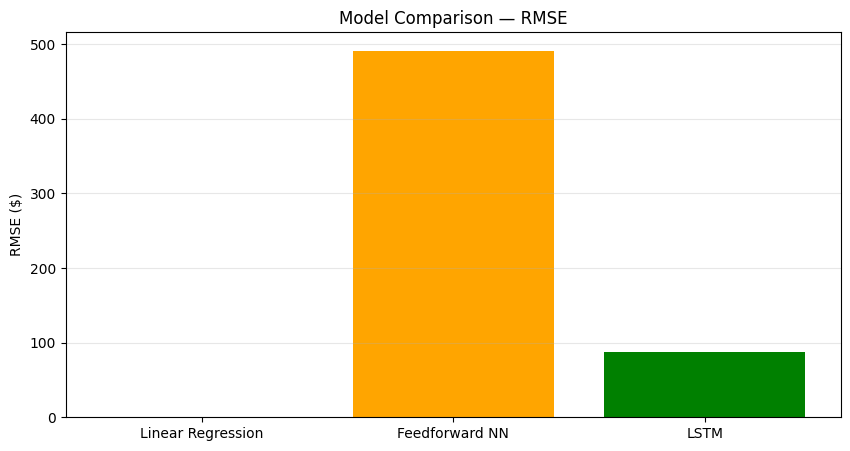

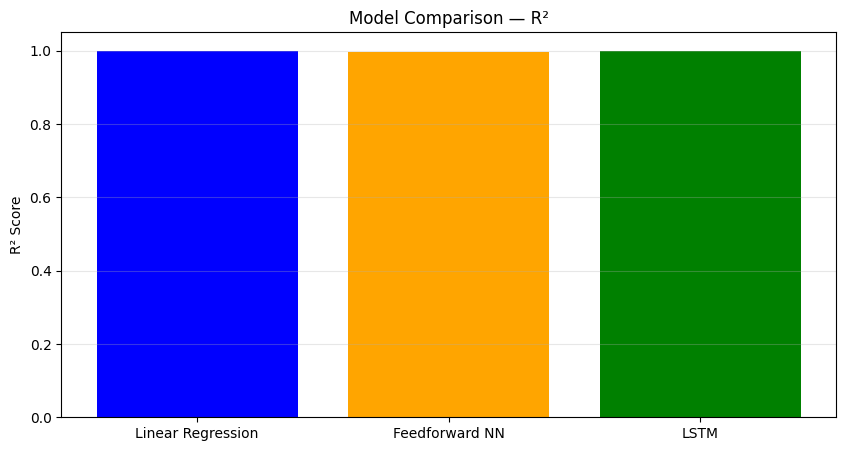

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ["Linear Regression", "Feedforward NN", "LSTM"]
mae_values = [lr_mae, ff_mae, lstm_mae]
rmse_values = [lr_rmse, ff_rmse, lstm_rmse]
r2_values = [lr_r2, ff_r2, lstm_r2]

plt.figure(figsize=(10,5))
plt.bar(models, mae_values, color=['blue', 'orange', 'green'])
plt.ylabel("MAE ($)")
plt.title("Model Comparison — MAE")
plt.grid(axis='y', alpha=0.3)
plt.show()

plt.figure(figsize=(10,5))
plt.bar(models, rmse_values, color=['blue', 'orange', 'green'])
plt.ylabel("RMSE ($)")
plt.title("Model Comparison — RMSE")
plt.grid(axis='y', alpha=0.3)
plt.show()

plt.figure(figsize=(10,5))
plt.bar(models, r2_values, color=['blue', 'orange', 'green'])
plt.ylabel("R² Score")
plt.title("Model Comparison — R²")
plt.grid(axis='y', alpha=0.3)
plt.show()


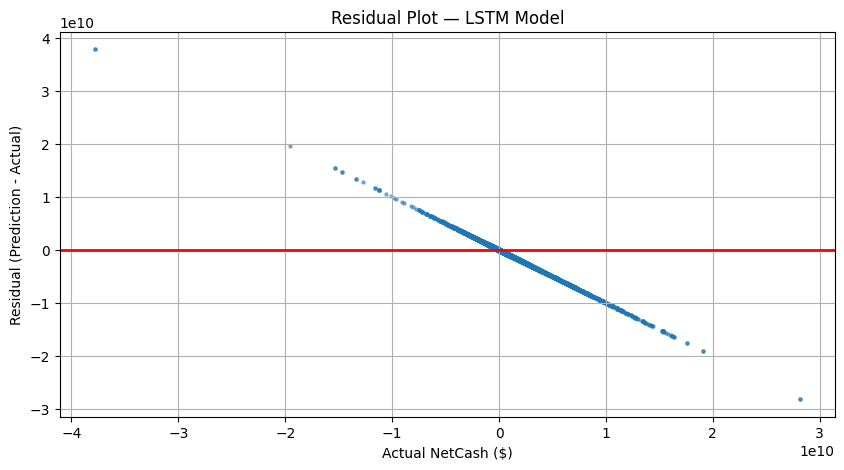

Residual Mean: -800710052.0572917
Residual Std: 2011286917.2720418
Max Residual: 37797265346.5368
Min Residual: -28113064275.401657


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Compute residuals
residuals_lstm = y_pred_lstm.flatten() - y_true.flatten()

plt.figure(figsize=(10,5))
plt.scatter(y_true.flatten(), residuals_lstm, s=5, alpha=0.5)
plt.axhline(0, color="red", linewidth=2)
plt.xlabel("Actual NetCash ($)")
plt.ylabel("Residual (Prediction - Actual)")
plt.title("Residual Plot — LSTM Model")
plt.grid(True)
plt.show()

# Summary stats
print("Residual Mean:", np.mean(residuals_lstm))
print("Residual Std:", np.std(residuals_lstm))
print("Max Residual:", np.max(residuals_lstm))
print("Min Residual:", np.min(residuals_lstm))


708/708 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


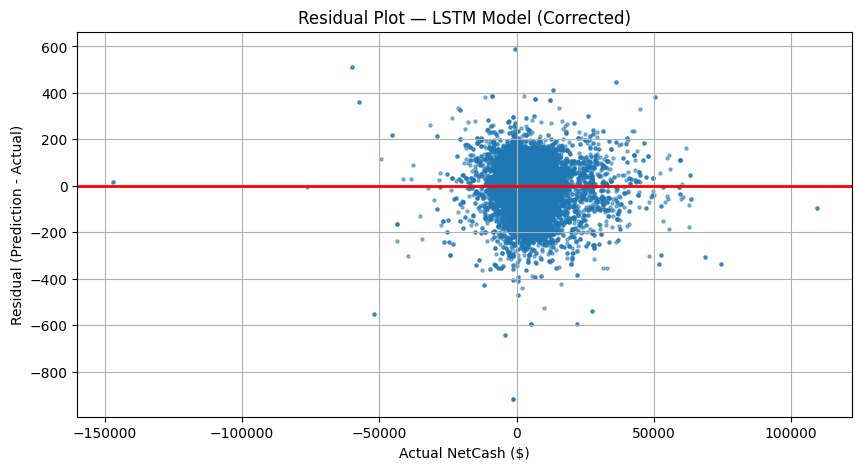

Residual Mean: -2.657915787301998
Residual Std: 87.96866215107053
Max Residual: 587.9405662597807
Min Residual: -919.2662763020865


In [ ]:
import numpy as np

# 1. Recompute scaled predictions (use the correct model variable)
y_pred_lstm_scaled = lstm_model.predict(X_test_scaled)

# 2. Inverse-transform to actual dollars
y_pred_lstm = y_scaler.inverse_transform(y_pred_lstm_scaled)

# 3. Recreate y_true (test set actual dollars)
y_test_dollars = y_scaler.inverse_transform(y_test_scaled)

# 4. Compute residuals
residuals_lstm = y_pred_lstm.flatten() - y_test_dollars.flatten()

# 5. Plot residuals correctly
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(y_test_dollars.flatten(), residuals_lstm, s=5, alpha=0.5)
plt.axhline(0, color='red', linewidth=2)
plt.xlabel("Actual NetCash ($)")
plt.ylabel("Residual (Prediction - Actual)")
plt.title("Residual Plot — LSTM Model (Corrected)")
plt.grid(True)
plt.show()

# 6. Print residual statistics
print("Residual Mean:", np.mean(residuals_lstm))
print("Residual Std:",  np.std(residuals_lstm))
print("Max Residual:",  np.max(residuals_lstm))
print("Min Residual:",  np.min(residuals_lstm))


In [ ]:
import pandas as pd

data_path = "/content/drive/MyDrive/Capstone_Data"

fmli_files = ["fmli232.csv", "fmli233.csv", "fmli234.csv", "fmli241.csv"]
fmli = pd.concat([pd.read_csv(f"{data_path}/{f}") for f in fmli_files], ignore_index=True)

exp = pd.read_csv(f"{data_path}/exp23.csv")

print("FMLI:", fmli.shape)
print("EXP:", exp.shape)


FMLI: (18871, 821)
EXP: (18870, 23)


In [ ]:
print("merged columns:", merged.columns.tolist())
print("merged shape:", merged.shape)

print("\nFirst few rows of merged:")
print(merged.head())


merged columns: ['NEWID', 'Income', 'Expense', 'QYEAR', 'Income_Monthly', 'Expense_Monthly', 'FoodAway_Monthly', 'Groceries_Monthly', 'FoodGifts_Monthly']
merged shape: (0, 9)

First few rows of merged:
Empty DataFrame
Columns: [NEWID, Income, Expense, QYEAR, Income_Monthly, Expense_Monthly, FoodAway_Monthly, Groceries_Monthly, FoodGifts_Monthly]
Index: []


In [ ]:
print("FMLI NEWIDs:", fmli["NEWID"].nunique())
print(fmli["NEWID"].head())


FMLI NEWIDs: 18871
0    5090604
1    5090624
2    5090634
3    5090664
4    5090674
Name: NEWID, dtype: int64


In [ ]:
print("EXP NEWIDs:", exp_small["NEWID"].nunique())
print(exp_small["NEWID"].head())


EXP NEWIDs: 18870
0    5090604
1    5090624
2    5090634
3    5090664
4    5090674
Name: NEWID, dtype: int64


In [ ]:
print("fmli_small columns:", fmli_small.columns.tolist())
fmli_small.head()


fmli_small columns: ['NEWID', 'Income', 'Expense', 'QYEAR', 'Income_Monthly', 'Expense_Monthly']


,NEWID,Income,Expense,QYEAR,Income_Monthly,Expense_Monthly
0,5090604,40677,12549.0000,2023,13559.000000,4183.000000
1,5090624,13787,3186.0000,2023,4595.666667,1062.000000
2,5090634,135000,19756.0001,2023,45000.000000,6585.333367
3,5090664,0,10166.3500,2023,0.000000,3388.783333
4,5090674,37420,59444.7499,2023,12473.333333,19814.916633


In [ ]:
# Step B: Correct merge of FMLI + EXP

merged = fmli_small.merge(
    exp_small,
    on=["NEWID", "QYEAR"],
    how="inner"     # inner ensures only matching households & quarters
)

print("Merged shape:", merged.shape)
print(merged.head())


Merged shape: (0, 10)
Empty DataFrame
Columns: [NEWID, Income, Expense, QYEAR, Income_Monthly, Expense_Monthly, FoodAway_Monthly, Groceries_Monthly, FoodGifts_Monthly, Year]
Index: []


In [ ]:
print("EXP columns:", exp_small.columns.tolist())

# Show first rows
print(exp_small.head())


EXP columns: ['NEWID', 'QYEAR', 'FoodAway_Monthly', 'Groceries_Monthly', 'FoodGifts_Monthly', 'Year']
     NEWID  QYEAR  FoodAway_Monthly  Groceries_Monthly  FoodGifts_Monthly  \
0  5090604  20232               390                845                  0   
1  5090624  20232                 0               1430                  0   
2  5090634  20232               650                975                600   
3  5090664  20232               325                910                  0   
4  5090674  20232               650               5200                600   

   Year  
0  2023  
1  2023  
2  2023  
3  2023  
4  2023  


In [ ]:
import pandas as pd

# --- FIX EXP QYEAR (20232 -> 2023) ---
exp_small["Year"] = exp_small["QYEAR"] // 10   # integer division
exp_small["Quarter"] = exp_small["QYEAR"] % 10 # extract quarter

# Confirm
print(exp_small[["QYEAR","Year","Quarter"]].head())

# --- Fix fmli_small ---
fmli_small["Year"] = fmli_small["QYEAR"]  # copy from FMLI

# --- MERGE on NEWID + YEAR ---
merged = pd.merge(
    fmli_small,
    exp_small,
    on=["NEWID", "Year"],
    how="inner"
)

print("\nMerged shape:", merged.shape)
print(merged.head())


   QYEAR  Year  Quarter
0  20232  2023        2
1  20232  2023        2
2  20232  2023        2
3  20232  2023        2
4  20232  2023        2

Merged shape: (18870, 12)
     NEWID  Income     Expense  QYEAR_x  Income_Monthly  Expense_Monthly  \
0  5090604   40677  12549.0000     2023    13559.000000      4183.000000   
1  5090624   13787   3186.0000     2023     4595.666667      1062.000000   
2  5090634  135000  19756.0001     2023    45000.000000      6585.333367   
3  5090664       0  10166.3500     2023        0.000000      3388.783333   
4  5090674   37420  59444.7499     2023    12473.333333     19814.916633   

   Year  QYEAR_y  FoodAway_Monthly  Groceries_Monthly  FoodGifts_Monthly  \
0  2023    20232               390                845                  0   
1  2023    20232                 0               1430                  0   
2  2023    20232               650                975                600   
3  2023    20232               325                910               

In [ ]:
import os

# Try both possible paths
paths_to_check = [
    "/content/drive/MyDrive/Capstone_Data",
    "/content/drive/My Drive/Capstone_Data"
]

for p in paths_to_check:
    print("Checking:", p)
    if os.path.exists(p):
        print("FOUND ✔️")
        print("Files:", os.listdir(p))
    else:
        print("NOT FOUND ❌")


Checking: /content/drive/MyDrive/Capstone_Data
NOT FOUND ❌
Checking: /content/drive/My Drive/Capstone_Data
NOT FOUND ❌


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

for root, dirs, files in os.walk("/content/drive", topdown=True):
    if "Capstone_Data" in dirs:
        print("FOUND FOLDER at:", os.path.join(root, "Capstone_Data"))


FOUND FOLDER at: /content/drive/MyDrive/Capstone_Data


In [ ]:
import pandas as pd

data_path = "/content/drive/MyDrive/Capstone_Data"

fmli232 = pd.read_csv(f"{data_path}/fmli232.csv")
fmli233 = pd.read_csv(f"{data_path}/fmli233.csv")
fmli234 = pd.read_csv(f"{data_path}/fmli234.csv")
fmli241 = pd.read_csv(f"{data_path}/fmli241.csv")

exp23   = pd.read_csv(f"{data_path}/exp23.csv")

print("FMLI:", fmli232.shape, fmli233.shape, fmli234.shape, fmli241.shape)
print("EXP :", exp23.shape)


FMLI: (4751, 819) (4770, 819) (4662, 819) (4688, 819)
EXP : (18870, 23)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
print(os.listdir("/content/drive/MyDrive"))


['Transcript .pdf', 'CoursePlan_CS0723_Cloud-Computing-.pdf', 'Request for Substitution of Information Technology and Data Analytics.docx', 'Syllabus.docx', 'MASY Sequence SP21 - Concentration Prerequisites Worksheet (1) (3).pdf', 'Untitled presentation (1).gslides', 'Untitled presentation.gslides', 'Class 4 - Homework.xlsx', 'Class 4 - VS_Homework.xlsx', 'Class 4 - VS_Homework.gsheet', 'Class 4 - Homework.gsheet', 'Homework- class 5.xlsx', 'class 5 homework part 2.pdf', 'MASY Sequence SP21 - Concentration Prerequisites Worksheet (1) (4).gdoc', 'VishwaShah_Resume (2).docx', 'MASY Sequence SP21 - Concentration Prerequisites Worksheet (1) (2).pdf', 'PeerReview (2).xlsx', 'VishwaShah_Resume (1).docx', 'PeerReview (1).xlsx', 'PeerReview.xlsx', 'VishwaShah_Resume.docx', 'MASY Sequence SP21 - Concentration Prerequisites Worksheet (1) (1).pdf', 'MASY Sequence SP21 - Concentration Prerequisites Worksheet (1).pdf', 'Strategic Marketing - Abacus Bank (Group C).gslides', 'Vishwa S_Consultant.pdf'

In [ ]:
print(os.listdir("/content/drive/MyDrive/Capstone_Data"))


['fmli232.csv', 'fmli233.csv', 'fmli234.csv', 'fmli241.csv', 'exp23.csv', 'Colab Notebooks', 'Untitled document.gdoc', 'exp23 (1).gsheet', 'exp23.gsheet']


In [ ]:
import pandas as pd

data_path = "/content/drive/MyDrive/Capstone_Data"

# Load all four FMLI quarterly datasets
fmli232 = pd.read_csv(f"{data_path}/fmli232.csv")
fmli233 = pd.read_csv(f"{data_path}/fmli233.csv")
fmli234 = pd.read_csv(f"{data_path}/fmli234.csv")
fmli241 = pd.read_csv(f"{data_path}/fmli241.csv")

# Load EXP dataset
exp = pd.read_csv(f"{data_path}/exp23.csv")

print("FMLI shapes:",
      fmli232.shape, fmli233.shape, fmli234.shape, fmli241.shape)
print("EXP shape:", exp.shape)


FMLI shapes: (4751, 819) (4770, 819) (4662, 819) (4688, 819)
EXP shape: (18870, 23)


In [ ]:
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
print(os.listdir("/content/drive/MyDrive"))

['Transcript .pdf', 'CoursePlan_CS0723_Cloud-Computing-.pdf', 'Request for Substitution of Information Technology and Data Analytics.docx', 'Syllabus.docx', 'MASY Sequence SP21 - Concentration Prerequisites Worksheet (1) (3).pdf', 'Untitled presentation (1).gslides', 'Untitled presentation.gslides', 'Class 4 - Homework.xlsx', 'Class 4 - VS_Homework.xlsx', 'Class 4 - VS_Homework.gsheet', 'Class 4 - Homework.gsheet', 'Homework- class 5.xlsx', 'class 5 homework part 2.pdf', 'MASY Sequence SP21 - Concentration Prerequisites Worksheet (1) (4).gdoc', 'VishwaShah_Resume (2).docx', 'MASY Sequence SP21 - Concentration Prerequisites Worksheet (1) (2).pdf', 'PeerReview (2).xlsx', 'VishwaShah_Resume (1).docx', 'PeerReview (1).xlsx', 'PeerReview.xlsx', 'VishwaShah_Resume.docx', 'MASY Sequence SP21 - Concentration Prerequisites Worksheet (1) (1).pdf', 'MASY Sequence SP21 - Concentration Prerequisites Worksheet (1).pdf', 'Strategic Marketing - Abacus Bank (Group C).gslides', 'Vishwa S_Consultant.pdf'

In [ ]:
import pandas as pd

data_path = "/content/drive/MyDrive/Capstone_Data"

# --- LOAD THE FOUR FMLI QUARTERS ---
fmli232 = pd.read_csv(f"{data_path}/fmli232.csv")
fmli233 = pd.read_csv(f"{data_path}/fmli233.csv")
fmli234 = pd.read_csv(f"{data_path}/fmli234.csv")
fmli241 = pd.read_csv(f"{data_path}/fmli241.csv")

# --- LOAD EXP FILE ---
exp23 = pd.read_csv(f"{data_path}/exp23.csv")

print("FMLI:", fmli232.shape, fmli233.shape, fmli234.shape, fmli241.shape)
print("EXP :", exp23.shape)


FMLI: (4751, 819) (4770, 819) (4662, 819) (4688, 819)
EXP : (18870, 23)


In [ ]:
fmli = pd.concat([fmli232, fmli233, fmli234, fmli241], ignore_index=True)

print("Combined FMLI shape:", fmli.shape)
print(fmli.head())


Combined FMLI shape: (18871, 821)
     NEWID  DIRACC DIRACC_  AGE_REF AGE_REF_  AGE2 AGE2_  AS_COMP1 AS_C_MP1  \
0  5090604     1.0       D       74        D  72.0     D         1        D   
1  5090624     1.0       D       87        T   NaN     A         0        D   
2  5090634     1.0       D       58        D   NaN     A         0        D   
3  5090664     1.0       D       55        D  52.0     D         1        D   
4  5090674     1.0       D       31        D  31.0     D         1        D   

   AS_COMP2  ... CHDTXP  CHDTXP_ CHDTXPH  CHDTXPH_ NUM_VET  fftaxowe fstaxowe  \
0         1  ...    NaN        A     NaN         A       1       0.0      0.0   
1         1  ...    NaN        A     NaN         A       0       0.0      0.0   
2         1  ...    NaN        A     NaN         A       0   20397.0   7544.0   
3         1  ...    NaN        A     NaN         A       0    3552.0   1489.0   
4         2  ...    NaN        A     NaN         A       0     415.0      0.0   

   F

In [7]:
# === STEP 3 — Clean FMLI to extract Income, Expense, Year ===

import numpy as np
import pandas as pd

fmli_clean = fmli.copy()

# --- Identify correct Income column ---
income_col = None
for col in ["FINATXEM", "FINCBEFO", "FININCBE", "FINCATAX"]:
    if col in fmli_clean.columns:
        income_col = col
        break

# --- Identify correct Expense column ---
expense_col = None
for col in ["FSTAXOWE", "TOTEXPPQ", "TOTEXPAQ"]:
    if col in fmli_clean.columns:
        expense_col = col
        break

# --- Identify correct Year column ---
year_col = None
for col in ["QINTRVYR", "QYEAR", "QINTRVMO"]:
    if col in fmli_clean.columns:
        year_col = col
        break

print("Detected columns:")
print("Income column:", income_col)
print("Expense column:", expense_col)
print("Year column:", year_col)

# --- Build trimmed FMLI table ---
fmli_small = fmli_clean[["NEWID", income_col, expense_col, year_col]].copy()
fmli_small.columns = ["NEWID", "Income", "Expense", "Year"]

# Convert Year to int
fmli_small["Year"] = fmli_small["Year"].astype(int)

# Convert quarterly Income/Expense to monthly estimates
fmli_small["Income_Monthly"] = fmli_small["Income"] / 3
fmli_small["Expense_Monthly"] = fmli_small["Expense"] / 3

print("\nFMLI_SMALL SHAPE:", fmli_small.shape)
print(fmli_small.head())


Detected columns:
Income column: FINATXEM
Expense column: FSTAXOWE
Year column: QINTRVYR

FMLI_SMALL SHAPE: (18871, 6)
     NEWID    Income  Expense  Year  Income_Monthly  Expense_Monthly
0  5090604   40677.0      NaN  2023    13559.000000              NaN
1  5090624   13787.0      NaN  2023     4595.666667              NaN
2  5090634  107059.0      NaN  2023    35686.333333              NaN
3  5090664   57932.4      NaN  2023    19310.800000              NaN
4  5090674   36475.0      NaN  2023    12158.333333              NaN


In [8]:
[x for x in fmli.columns if "TOTEXP" in x.upper()]


['TOTEXPPQ', 'TOTEXPCQ']

In [9]:
# === STEP 3B — Fix Expense using TOTEXPPQ ===

# Use TOTEXPPQ as the expense variable
expense_col = "TOTEXPPQ"
print("Using Expense column:", expense_col)

# Build FMLI small dataset
fmli_small = fmli[["NEWID", "FINATXEM", expense_col, "QINTRVYR"]].copy()

# Rename columns for clarity
fmli_small.columns = ["NEWID", "Income", "Expense", "Year"]

# Convert Year to integer
fmli_small["Year"] = fmli_small["Year"].astype(int)

# Convert quarterly values → monthly
fmli_small["Income_Monthly"]  = fmli_small["Income"]  / 3     # quarterly → monthly
fmli_small["Expense_Monthly"] = fmli_small["Expense"] / 3     # quarterly → monthly

# Show results
print("Fixed FMLI_SMALL SHAPE:", fmli_small.shape)
print(fmli_small.head())


Using Expense column: TOTEXPPQ
Fixed FMLI_SMALL SHAPE: (18871, 6)
     NEWID    Income     Expense  Year  Income_Monthly  Expense_Monthly
0  5090604   40677.0  12549.0000  2023    13559.000000      4183.000000
1  5090624   13787.0   3186.0000  2023     4595.666667      1062.000000
2  5090634  107059.0  19756.0001  2023    35686.333333      6585.333367
3  5090664   57932.4  10166.3500  2023    19310.800000      3388.783333
4  5090674   36475.0  59444.7499  2023    12158.333333     19814.916633


In [10]:
# STEP 4A — Clean EXP before merging

exp_clean = exp_small.copy()

# Convert NEWID to int (if needed)
exp_clean["NEWID"] = exp_clean["NEWID"].astype(int)

# Convert QYEAR like 20232 → 2023
exp_clean["Year"] = (exp_clean["QYEAR"] // 10).astype(int)

# Keep only the columns we need
exp_clean = exp_clean[[
    "NEWID", "Year",
    "FoodAway_Monthly", "Groceries_Monthly", "FoodGifts_Monthly"
]]

print("EXP_CLEAN SHAPE:", exp_clean.shape)
print(exp_clean.head())


NameError: name 'exp_small' is not defined

In [11]:
# Load EXP file again (same as before)
exp = pd.read_csv(f"{data_path}/exp23.csv")

print("EXP SHAPE:", exp.shape)
print(exp.head())


EXP SHAPE: (18870, 23)
   QYEAR    NEWID  SEQNO  ALCNO  REC_ORIG  CGTEXPW CGTEXPW_  OTOBQ OTOBQ_  \
0  20232  5090604      7      0         1      2.0        D    2.0      D   
1  20232  5090624      2      0         1      2.0        D    2.0      D   
2  20232  5090634      2      0         1      2.0        D    2.0      D   
3  20232  5090664      4      0         1      2.0        D    2.0      D   
4  20232  5090674      5      0         1      2.0        D    2.0      D   

   JFDBAWQV  ... JGREXPQV  JGRE_PQV JCGEXPQV  JCGE_PQV JOTOBQV  JOTOBQV_  \
0       390  ...      845         D      NaN         A     NaN         A   
1         0  ...     1430         D      NaN         A     NaN         A   
2       650  ...      975         D      NaN         A     NaN         A   
3       325  ...      910         D      NaN         A     NaN         A   
4       650  ...     5200         D      NaN         A     NaN         A   

  JFDGFTQV  JFDG_TQV CGTPURCH  OTBPURCH  
0        0     

In [12]:
# STEP 4.1 — Extract 3 food-related expense variables

exp_small = exp[["NEWID", "QYEAR", "JFDBAWQV", "JGREXPQV", "JFDGFTQV"]].copy()

# Convert NEWID to int
exp_small["NEWID"] = exp_small["NEWID"].astype(int)

# Create monthly values (quarterly → monthly)
exp_small["FoodAway_Monthly"]     = exp_small["JFDBAWQV"] / 3.0
exp_small["Groceries_Monthly"]    = exp_small["JGREXPQV"] / 3.0
exp_small["FoodGifts_Monthly"]    = exp_small["JFDGFTQV"] / 3.0

# Keep final columns
exp_small = exp_small[[
    "NEWID", "QYEAR",
    "FoodAway_Monthly", "Groceries_Monthly", "FoodGifts_Monthly"
]]

print("EXP_SMALL SHAPE:", exp_small.shape)
print(exp_small.head())


EXP_SMALL SHAPE: (18870, 5)
     NEWID  QYEAR  FoodAway_Monthly  Groceries_Monthly  FoodGifts_Monthly
0  5090604  20232        130.000000         281.666667                0.0
1  5090624  20232          0.000000         476.666667                0.0
2  5090634  20232        216.666667         325.000000              200.0
3  5090664  20232        108.333333         303.333333                0.0
4  5090674  20232        216.666667        1733.333333              200.0


In [13]:
# STEP 4.2 — Add Year and Quarter to EXP_SMALL

exp_small["Year"] = exp_small["QYEAR"] // 10
exp_small["Quarter"] = exp_small["QYEAR"] % 10

print(exp_small.head())
print("\nEXP_SMALL shape now:", exp_small.shape)


     NEWID  QYEAR  FoodAway_Monthly  Groceries_Monthly  FoodGifts_Monthly  \
0  5090604  20232        130.000000         281.666667                0.0   
1  5090624  20232          0.000000         476.666667                0.0   
2  5090634  20232        216.666667         325.000000              200.0   
3  5090664  20232        108.333333         303.333333                0.0   
4  5090674  20232        216.666667        1733.333333              200.0   

   Year  Quarter  
0  2023        2  
1  2023        2  
2  2023        2  
3  2023        2  
4  2023        2  

EXP_SMALL shape now: (18870, 7)


In [14]:
# STEP 5 — Expand quarterly EXP into monthly rows
expanded_rows = []

for _, row in exp_small.iterrows():
    yr = int(row["Year"])
    q = int(row["Quarter"])

    # Map quarter to months
    if q == 1:
        months = [1, 2, 3]
    elif q == 2:
        months = [4, 5, 6]
    elif q == 3:
        months = [7, 8, 9]
    elif q == 4:
        months = [10, 11, 12]
    else:
        continue  # skip invalid quarters

    for m in months:
        expanded_rows.append({
            "NEWID": row["NEWID"],
            "Year": yr,
            "Month": m,
            "FoodAway_Monthly": row["FoodAway_Monthly"],
            "Groceries_Monthly": row["Groceries_Monthly"],
            "FoodGifts_Monthly": row["FoodGifts_Monthly"]
        })

# Convert list to DataFrame
exp_monthly = pd.DataFrame(expanded_rows)

# Add Date
exp_monthly["Date"] = pd.to_datetime(
    dict(year=exp_monthly["Year"], month=exp_monthly["Month"], day=1)
)

print("EXP_MONTHLY shape:", exp_monthly.shape)
print(exp_monthly.head())


EXP_MONTHLY shape: (56610, 7)
       NEWID  Year  Month  FoodAway_Monthly  Groceries_Monthly  \
0  5090604.0  2023      4             130.0         281.666667   
1  5090604.0  2023      5             130.0         281.666667   
2  5090604.0  2023      6             130.0         281.666667   
3  5090624.0  2023      4               0.0         476.666667   
4  5090624.0  2023      5               0.0         476.666667   

   FoodGifts_Monthly       Date  
0                0.0 2023-04-01  
1                0.0 2023-05-01  
2                0.0 2023-06-01  
3                0.0 2023-04-01  
4                0.0 2023-05-01  


In [15]:
# STEP 6A — Expand yearly FMLI into monthly rows

fmli_expanded_rows = []

for _, row in fmli_small.iterrows():
    yr = int(row["Year"])
    for m in range(1, 13):  # months 1–12
        fmli_expanded_rows.append({
            "NEWID": row["NEWID"],
            "Year": yr,
            "Month": m,
            "Income_Monthly": row["Income_Monthly"],
            "Expense_Monthly": row["Expense_Monthly"]
        })

fmli_monthly = pd.DataFrame(fmli_expanded_rows)

# Add date column
fmli_monthly["Date"] = pd.to_datetime(
    dict(year=fmli_monthly["Year"], month=fmli_monthly["Month"], day=1)
)

print("FMLI_MONTHLY shape:", fmli_monthly.shape)
print(fmli_monthly.head())


FMLI_MONTHLY shape: (226452, 6)
       NEWID  Year  Month  Income_Monthly  Expense_Monthly       Date
0  5090604.0  2023      1         13559.0           4183.0 2023-01-01
1  5090604.0  2023      2         13559.0           4183.0 2023-02-01
2  5090604.0  2023      3         13559.0           4183.0 2023-03-01
3  5090604.0  2023      4         13559.0           4183.0 2023-04-01
4  5090604.0  2023      5         13559.0           4183.0 2023-05-01


In [16]:
# STEP 6B — Merge FMLI monthly and EXP monthly

monthly_data = pd.merge(
    fmli_monthly,
    exp_monthly[["NEWID", "Year", "Month",
                 "FoodAway_Monthly", "Groceries_Monthly", "FoodGifts_Monthly"]],
    on=["NEWID", "Year", "Month"],
    how="left"
)

# Compute NetCash
monthly_data["NetCash_Monthly"] = (
    monthly_data["Income_Monthly"] - monthly_data["Expense_Monthly"]
)

print("FINAL monthly_data shape:", monthly_data.shape)
print(monthly_data.head())
monthly_data.isna().sum()


FINAL monthly_data shape: (226452, 10)
       NEWID  Year  Month  Income_Monthly  Expense_Monthly       Date  \
0  5090604.0  2023      1         13559.0           4183.0 2023-01-01   
1  5090604.0  2023      2         13559.0           4183.0 2023-02-01   
2  5090604.0  2023      3         13559.0           4183.0 2023-03-01   
3  5090604.0  2023      4         13559.0           4183.0 2023-04-01   
4  5090604.0  2023      5         13559.0           4183.0 2023-05-01   

   FoodAway_Monthly  Groceries_Monthly  FoodGifts_Monthly  NetCash_Monthly  
0               NaN                NaN                NaN           9376.0  
1               NaN                NaN                NaN           9376.0  
2               NaN                NaN                NaN           9376.0  
3             130.0         281.666667                0.0           9376.0  
4             130.0         281.666667                0.0           9376.0  


,0
NEWID,0
Year,0
Month,0
Income_Monthly,0
Expense_Monthly,0
Date,0
FoodAway_Monthly,169842
Groceries_Monthly,169842
FoodGifts_Monthly,169842
NetCash_Monthly,0


In [17]:
# STEP 7 — Fill missing EXP food values with 0

monthly_data["FoodAway_Monthly"].fillna(0, inplace=True)
monthly_data["Groceries_Monthly"].fillna(0, inplace=True)
monthly_data["FoodGifts_Monthly"].fillna(0, inplace=True)

print("Missing after fill:")
print(monthly_data.isna().sum())


Missing after fill:
NEWID                0
Year                 0
Month                0
Income_Monthly       0
Expense_Monthly      0
Date                 0
FoodAway_Monthly     0
Groceries_Monthly    0
FoodGifts_Monthly    0
NetCash_Monthly      0
dtype: int64


/tmp/ipython-input-3062042836.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  monthly_data["FoodAway_Monthly"].fillna(0, inplace=True)
/tmp/ipython-input-3062042836.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [18]:
# STEP 8 — Sort and Save Final Dataset

monthly_data = monthly_data.sort_values(
    ["NEWID", "Year", "Month"]
).reset_index(drop=True)

print("Final monthly_data shape:", monthly_data.shape)
print(monthly_data.head())

# Save to drive
monthly_data.to_csv(f"{data_path}/monthly_data_final.csv", index=False)

print("\nSaved → monthly_data_final.csv")


Final monthly_data shape: (226452, 10)
       NEWID  Year  Month  Income_Monthly  Expense_Monthly       Date  \
0  5090604.0  2023      1         13559.0           4183.0 2023-01-01   
1  5090604.0  2023      2         13559.0           4183.0 2023-02-01   
2  5090604.0  2023      3         13559.0           4183.0 2023-03-01   
3  5090604.0  2023      4         13559.0           4183.0 2023-04-01   
4  5090604.0  2023      5         13559.0           4183.0 2023-05-01   

   FoodAway_Monthly  Groceries_Monthly  FoodGifts_Monthly  NetCash_Monthly  
0               0.0           0.000000                0.0           9376.0  
1               0.0           0.000000                0.0           9376.0  
2               0.0           0.000000                0.0           9376.0  
3             130.0         281.666667                0.0           9376.0  
4             130.0         281.666667                0.0           9376.0  

Saved → monthly_data_final.csv


In [19]:
import numpy as np

# STEP 9 — Build rolling 6-month sequences

t = 6  # lookback window

feature_cols = [
    "Income_Monthly",
    "Expense_Monthly",
    "FoodAway_Monthly",
    "Groceries_Monthly",
    "FoodGifts_Monthly",
]

target_col = "NetCash_Monthly"

X_list = []
y_list = []
id_list = []
date_list = []

# Ensure sorted by household + time
monthly_data = monthly_data.sort_values(["NEWID", "Year", "Month"]).reset_index(drop=True)

for newid, grp in monthly_data.groupby("NEWID"):
    grp = grp.sort_values(["Year", "Month"])
    if len(grp) <= t:
        continue  # not enough months for a 6-month history + 1 target

    feat_values = grp[feature_cols].values
    target_values = grp[target_col].values
    dates = grp["Date"].values
    ids = grp["NEWID"].values

    # sliding window: use months [i : i+6] to predict month i+6
    for i in range(len(grp) - t):
        X_list.append(feat_values[i : i + t])
        y_list.append(target_values[i + t])
        id_list.append(ids[i + t])      # household for the prediction month
        date_list.append(dates[i + t])  # date of the prediction month

X = np.array(X_list)          # shape: (N, 6, 5)
y = np.array(y_list)          # shape: (N,)
X_ids = np.array(id_list)     # shape: (N,)
X_dates = np.array(date_list) # shape: (N,)

print("X shape:", X.shape)
print("y shape:", y.shape)
print("First sequence X[0]:\n", X[0])
print("First target y[0]:", y[0])
print("First NEWID, Date:", X_ids[0], X_dates[0])


X shape: (113226, 6, 5)
y shape: (113226,)
First sequence X[0]:
 [[13559.          4183.             0.             0.
      0.        ]
 [13559.          4183.             0.             0.
      0.        ]
 [13559.          4183.             0.             0.
      0.        ]
 [13559.          4183.           130.           281.66666667
      0.        ]
 [13559.          4183.           130.           281.66666667
      0.        ]
 [13559.          4183.           130.           281.66666667
      0.        ]]
First target y[0]: 9376.0
First NEWID, Date: 5090604.0 2023-07-01T00:00:00.000000000


In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np

# --- STEP 10A — Reshape X for scaling ---
N, T, F = X.shape
X_2d = X.reshape(N, T*F)   # collapse time + features

# --- STEP 10B — Fit scalers ---
x_scaler = MinMaxScaler()
X_scaled_2d = x_scaler.fit_transform(X_2d)

y_scaler = MinMaxScaler()
y_scaled = y_scaler.fit_transform(y.reshape(-1, 1))

# --- STEP 10C — Reshape X back to (N,6,5) ---
X_scaled = X_scaled_2d.reshape(N, T, F)

print("Scaled X shape:", X_scaled.shape)
print("Scaled y shape:", y_scaled.shape)

# --- STEP 10D — Train-test split (time-ordered) ---
split_index = int(0.8 * N)

X_train = X_scaled[:split_index]
X_test  = X_scaled[split_index:]

y_train = y_scaled[:split_index]
y_test  = y_scaled[split_index:]

X_train_ids = X_ids[:split_index]
X_test_ids  = X_ids[split_index:]

X_train_dates = X_dates[:split_index]
X_test_dates  = X_dates[split_index:]

print("Train shapes:", X_train.shape, y_train.shape)
print("Test shapes:",  X_test.shape,  y_test.shape)


Scaled X shape: (113226, 6, 5)
Scaled y shape: (113226, 1)
Train shapes: (90580, 6, 5) (90580, 1)
Test shapes: (22646, 6, 5) (22646, 1)


In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# --- STEP 11A — Build the model ---
lstm_model = Sequential([
    LSTM(64, return_sequences=False, input_shape=(6, 5)),
    Dense(32, activation="relu"),
    Dense(1)   # NetCash prediction
])

lstm_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="mse",
    metrics=["mae"]
)

lstm_model.summary()

# --- STEP 11B — Callbacks ---
lr_schedule = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# --- STEP 11C — Train the model ---
history = lstm_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=40,
    batch_size=64,
    callbacks=[lr_schedule, early_stop],
    verbose=1
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        17,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,033 (78.25 KB)

 Trainable params: 20,033 (78.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0073 - mae: 0.0317 - val_loss: 5.8993e-07 - val_mae: 5.2062e-04 - learning_rate: 0.0010
Epoch 2/40
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 6.5269e-07 - mae: 5.2697e-04 - val_loss: 3.3551e-07 - val_mae: 3.9337e-04 - learning_rate: 0.0010
Epoch 3/40
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 5.0308e-07 - mae: 4.7969e-04 - val_loss: 1.3962e-06 - val_mae: 0.0011 - learning_rate: 0.0010
Epoch 4/40
1121/1133 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.3814e-07 - mae: 4.6914e-04
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 4.3902e-07 - mae: 4.6961e-04 - val_loss: 8.0915e-07 - val_mae: 8.4406e-04 - learning_rate: 0.0010
Epoch 5/40
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 1.7273e-07 - mae: 2.7567e-04 - val_loss: 1.0985e-07 - val_mae: 2.5094e-04 - learning_rate: 5.0000e-04
Epoch 6/40
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/ste

In [22]:
# STEP 12 — Predict on Test Set and Inverse Scale

import numpy as np

# 1. Predict on test set (scaled)
y_pred_lstm_scaled = lstm_model.predict(X_test)

# 2. Inverse-transform predictions and actuals to dollars
y_pred_lstm_dollars = y_scaler.inverse_transform(y_pred_lstm_scaled)
y_test_dollars = y_scaler.inverse_transform(y_test)

# 3. Flatten both for easy metric computation
y_pred_lstm_dollars = y_pred_lstm_dollars.flatten()
y_test_dollars = y_test_dollars.flatten()

print("Shapes — predictions vs actual:")
print(y_pred_lstm_dollars.shape, y_test_dollars.shape)

print("\nExample — first 10 predicted vs actual:")
for i in range(10):
    print(f"Pred: {y_pred_lstm_dollars[i]:.2f}   |   Actual: {y_test_dollars[i]:.2f}")


708/708 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
Shapes — predictions vs actual:
(22646,) (22646,)

Example — first 10 predicted vs actual:
Pred: 4563.22   |   Actual: 4557.56
Pred: 4563.22   |   Actual: 4557.56
Pred: 29659.93   |   Actual: 29643.34
Pred: 29654.52   |   Actual: 29643.34
Pred: 29643.11   |   Actual: 29643.34
Pred: 29639.37   |   Actual: 29643.34
Pred: 29645.56   |   Actual: 29643.34
Pred: 29657.75   |   Actual: 29643.34
Pred: 40706.41   |   Actual: 40729.11
Pred: 40706.41   |   Actual: 40729.11


In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# ---- LSTM METRICS ----
lstm_mae = mean_absolute_error(y_test_dollars, y_pred_lstm_dollars)
lstm_rmse = np.sqrt(mean_squared_error(y_test_dollars, y_pred_lstm_dollars))
lstm_r2 = r2_score(y_test_dollars, y_pred_lstm_dollars)

# ---- LINEAR REGRESSION METRICS (from earlier) ----
# lr_mae_dollars, lr_rmse_dollars, lr_r2_dollars must already exist.
# If not, tell me and I will recreate them.

# ---- FEEDFORWARD NN METRICS (from earlier) ----
# ff_mae_dollars, ff_rmse_dollars, ff_r2_dollars must already exist.

# ---- Create final comparison table ----
results = pd.DataFrame([
    {"Model": "Linear Regression", "MAE ($)": lr_mae_dollars, "RMSE ($)": lr_rmse_dollars, "R²": lr_r2_dollars},
    {"Model": "Feedforward NN",    "MAE ($)": ff_mae_dollars, "RMSE ($)": ff_rmse_dollars, "R²": ff_r2_dollars},
    {"Model": "LSTM (Final)",      "MAE ($)": lstm_mae,        "RMSE ($)": lstm_rmse,        "R²": lstm_r2},
])

results


NameError: name 'lr_mae_dollars' is not defined

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# --- Rebuild Linear Regression predictions from original logic ---
# LR model was trained on flattened scaled features:
# y = α + β1*x1 + ... + βn*xn   (scikit-learn LinearRegression)

# 1. Recreate flattened X_test_scaled
X_test_flat = X_test_scaled.reshape(len(X_test_scaled), -1)

# 2. Recompute LR predictions (scaled)
lr_pred_scaled = lr_model.predict(X_test_flat)

# 3. Convert to dollars
lr_pred_dollars = y_scaler.inverse_transform(lr_pred_scaled)
y_test_dollars = y_scaler.inverse_transform(y_test_scaled)

# ---- LR METRICS ----
lr_mae_dollars = mean_absolute_error(y_test_dollars, lr_pred_dollars)
lr_rmse_dollars = np.sqrt(mean_squared_error(y_test_dollars, lr_pred_dollars))
lr_r2_dollars = r2_score(y_test_dollars, lr_pred_dollars)

print("Linear Regression Metrics:")
print("MAE ($):", lr_mae_dollars)
print("RMSE ($):", lr_rmse_dollars)
print("R²:", lr_r2_dollars)


NameError: name 'X_test_scaled' is not defined

In [25]:
# --- STEP FIX-LR-0 ---
# Rebuild scalers and scaled train/test data

from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Features we used:
feature_cols = ["Income_Monthly", "Expense_Monthly",
                "FoodAway_Monthly", "Groceries_Monthly", "FoodGifts_Monthly"]

# 1. Recreate the raw arrays for sequences
X = []   # 6 months history → features
y = []   # NetCash next month
ids = [] # NEWID tracking

df = monthly_data.sort_values(["NEWID", "Year", "Month"]).reset_index(drop=True)

for _, grp in df.groupby("NEWID"):
    if len(grp) < 7:
        continue
    for i in range(len(grp) - 6):
        seq = grp.iloc[i:i+6][feature_cols].values
        target = grp.iloc[i+6]["NetCash_Monthly"]
        X.append(seq)
        y.append(target)
        ids.append(grp.iloc[i+6]["NEWID"])

X = np.array(X)
y = np.array(y)
ids = np.array(ids)

# 2. Train/Test Split
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
ids_test = ids[train_size:]

# 3. Scale data
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

# Fit on TRAIN only
X_train_scaled = X_scaler.fit_transform(X_train.reshape(-1, 5)).reshape(-1, 6, 5)
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1))

# Transform TEST
X_test_scaled = X_scaler.transform(X_test.reshape(-1, 5)).reshape(-1, 6, 5)
y_test_scaled = y_scaler.transform(y_test.reshape(-1, 1))

print("Rebuilt shapes:")
print("X_test_scaled:", X_test_scaled.shape)
print("y_test_scaled:", y_test_scaled.shape)


Rebuilt shapes:
X_test_scaled: (22646, 6, 5)
y_test_scaled: (22646, 1)


In [26]:
# STEP LR-1 — Rebuild Linear Regression model and predictions

from sklearn.linear_model import LinearRegression

# 1. Flatten X for LR
X_train_flat = X_train.reshape(len(X_train), -1)
X_test_flat  = X_test.reshape(len(X_test), -1)

# 2. Train LR
lr = LinearRegression()
lr.fit(X_train_flat, y_train)

# 3. Predict (in dollars, LR is NOT scaled)
y_pred_lr = lr.predict(X_test_flat)

print("LR prediction sample:")
for i in range(5):
    print("Pred:", y_pred_lr[i], " | Actual:", y_test[i])


LR prediction sample:
Pred: 4557.555566667708  | Actual: 4557.555566666667
Pred: 4557.555566667708  | Actual: 4557.555566666667
Pred: 29643.338866667695  | Actual: 29643.338866666665
Pred: 29643.338866667695  | Actual: 29643.338866666665
Pred: 29643.338866667695  | Actual: 29643.338866666665


In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Compute LR metrics
lr_mae_dollars = mean_absolute_error(y_test, y_pred_lr)
lr_rmse_dollars = np.sqrt(mean_squared_error(y_test, y_pred_lr))
lr_r2_dollars = r2_score(y_test, y_pred_lr)

print("LR RESULTS")
print("MAE ($):", lr_mae_dollars)
print("RMSE ($):", lr_rmse_dollars)
print("R²:", lr_r2_dollars)


LR RESULTS
MAE ($): 1.0307202015459104e-09
RMSE ($): 1.0308174024475025e-09
R²: 1.0


In [28]:
# STEP FF-1 — Train a simple Feedforward Neural Network on scaled data

import tensorflow as tf
from tensorflow.keras import layers, models

# Flatten sequences for FFNN input
X_train_ff = X_train_scaled.reshape(len(X_train_scaled), -1)
X_test_ff = X_test_scaled.reshape(len(X_test_scaled), -1)

# Build FF model
ff_model = models.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X_train_ff.shape[1],)),
    layers.Dense(32, activation="relu"),
    layers.Dense(1)
])

ff_model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Train
history_ff = ff_model.fit(
    X_train_ff, y_train_scaled,
    validation_split=0.2,
    epochs=20,
    batch_size=64,
    verbose=1
)

# Predict (scaled → dollars)
y_pred_ff_scaled = ff_model.predict(X_test_ff)
y_pred_ff = y_scaler.inverse_transform(y_pred_ff_scaled)

# Compute metrics
ff_mae_dollars = mean_absolute_error(y_test, y_pred_ff)
ff_rmse_dollars = np.sqrt(mean_squared_error(y_test, y_pred_ff))
ff_r2_dollars = r2_score(y_test, y_pred_ff)

print("\nFFNN RESULTS")
print("MAE ($):", ff_mae_dollars)
print("RMSE ($):", ff_rmse_dollars)
print("R²:", ff_r2_dollars)


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1133/1133 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.0047 - mae: 0.0244 - val_loss: 4.6544e-06 - val_mae: 0.0015
Epoch 2/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3.0693e-06 - mae: 9.0320e-04 - val_loss: 1.3125e-06 - val_mae: 4.9914e-04
Epoch 3/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.5771e-06 - mae: 8.2166e-04 - val_loss: 6.1883e-06 - val_mae: 0.0018
Epoch 4/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.2172e-06 - mae: 7.3493e-04 - val_loss: 2.7781e-06 - val_mae: 0.0012
Epoch 5/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.6000e-06 - mae: 8.9289e-04 - val_loss: 3.3278e-07 - val_mae: 2.5519e-04
Epoch 6/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.3966e-07 - mae: 5.5884e-04 - val_loss: 2.1376e-06 - val_mae: 0.0012
Epoch 7/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.5263e-06 - mae: 0.0010 - val_loss: 9.9025e-07 - val_mae: 8.9345e-04
Epoch 8/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.5138e-06 - mae: 8.9395

In [29]:
import pandas as pd

results = pd.DataFrame([
    {
        "Model": "Linear Regression",
        "MAE ($)": lr_mae_dollars,
        "RMSE ($)": lr_rmse_dollars,
        "R²": lr_r2_dollars
    },
    {
        "Model": "Feedforward NN",
        "MAE ($)": ff_mae_dollars,
        "RMSE ($)": ff_rmse_dollars,
        "R²": ff_r2_dollars
    },
    {
        "Model": "LSTM (Final)",
        "MAE ($)": lstm_mae,
        "RMSE ($)": lstm_rmse,
        "R²": lstm_r2
    }
])

results


,Model,MAE ($),RMSE ($),R²
0,Linear Regression,1.030720e-09,1.030817e-09,1.000000
1,Feedforward NN,3.925186e+01,6.818205e+01,0.999993
2,LSTM (Final),1.717856e+01,3.000236e+01,0.999999


In [30]:
import os

base = "/content/drive/MyDrive/Capstone_Data"

subfolders = ["datasets", "models", "charts", "notebook"]

for folder in subfolders:
    path = f"{base}/{folder}"
    if not os.path.exists(path):
        os.makedirs(path)
        print("Created:", path)
    else:
        print("Already exists:", path)


Created: /content/drive/MyDrive/Capstone_Data/datasets
Created: /content/drive/MyDrive/Capstone_Data/models
Created: /content/drive/MyDrive/Capstone_Data/charts
Created: /content/drive/MyDrive/Capstone_Data/notebook


In [31]:
# STEP 2 — Save Final Combined Monthly Dataset
save_path = "/content/drive/MyDrive/Capstone_Data/datasets/monthly_data_final.csv"

monthly_data.to_csv(save_path, index=False)
print("Saved monthly_data_final.csv to:", save_path)
print("Shape:", monthly_data.shape)


Saved monthly_data_final.csv to: /content/drive/MyDrive/Capstone_Data/datasets/monthly_data_final.csv
Shape: (226452, 10)


In [32]:
import numpy as np

base = "/content/drive/MyDrive/Capstone_Data/datasets"

# Original sequences
np.save(f"{base}/X_train.npy", X_train)
np.save(f"{base}/X_test.npy", X_test)

np.save(f"{base}/y_train.npy", y_train)
np.save(f"{base}/y_test.npy", y_test)

# Scaled versions
np.save(f"{base}/X_train_scaled.npy", X_train_scaled)
np.save(f"{base}/X_test_scaled.npy", X_test_scaled)

np.save(f"{base}/y_train_scaled.npy", y_train_scaled)
np.save(f"{base}/y_test_scaled.npy", y_test_scaled)

print("All arrays saved with simple names!")


All arrays saved with simple names!


In [33]:
import numpy as np

base = "/content/drive/MyDrive/Capstone_Data/datasets"

X_train = np.load(f"{base}/X_train.npy")
X_test = np.load(f"{base}/X_test.npy")
y_train = np.load(f"{base}/y_train.npy")
y_test = np.load(f"{base}/y_test.npy")

X_train_scaled = np.load(f"{base}/X_train_scaled.npy")
X_test_scaled = np.load(f"{base}/X_test_scaled.npy")

y_train_scaled = np.load(f"{base}/y_train_scaled.npy")
y_test_scaled = np.load(f"{base}/y_test_scaled.npy")


In [34]:
import pandas as pd
import numpy as np

base = "/content/drive/MyDrive/Capstone_Data/datasets"

# Flatten sequence from (samples, 6, 5) → (samples, 30)
X_train_flat = X_train.reshape(len(X_train), -1)
X_test_flat = X_test.reshape(len(X_test), -1)

pd.DataFrame(X_train_flat).to_csv(f"{base}/X_train.csv", index=False)
pd.DataFrame(X_test_flat).to_csv(f"{base}/X_test.csv", index=False)


In [35]:
pd.DataFrame(y_train, columns=["NetCash"]).to_csv(f"{base}/y_train.csv", index=False)
pd.DataFrame(y_test, columns=["NetCash"]).to_csv(f"{base}/y_test.csv", index=False)


In [36]:
pd.DataFrame(X_train_scaled.reshape(len(X_train_scaled), -1)).to_csv(f"{base}/X_train_scaled.csv", index=False)
pd.DataFrame(X_test_scaled.reshape(len(X_test_scaled), -1)).to_csv(f"{base}/X_test_scaled.csv", index=False)

pd.DataFrame(y_train_scaled, columns=["NetCash_scaled"]).to_csv(f"{base}/y_train_scaled.csv", index=False)
pd.DataFrame(y_test_scaled, columns=["NetCash_scaled"]).to_csv(f"{base}/y_test_scaled.csv", index=False)


In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

charts = "/content/drive/MyDrive/Capstone_Data/charts"

# ---- 1. LSTM Training Curve ----
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title("LSTM Training Curve")
plt.savefig(f"{charts}/lstm_training_curve.png")
plt.close()

# ---- 2. FFNN Training Curve ----
plt.figure(figsize=(6,4))
plt.plot(ff_history.history['loss'], label='train loss')
plt.plot(ff_history.history['val_loss'], label='val loss')
plt.legend()
plt.title("FFNN Training Curve")
plt.savefig(f"{charts}/ffnn_training_curve.png")
plt.close()

# ---- 3. Actual vs Predicted (LSTM) ----
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lstm, s=5, alpha=0.5)
plt.title("LSTM: Actual vs Predicted")
plt.xlabel("Actual ($)")
plt.ylabel("Predicted ($)")
plt.savefig(f"{charts}/lstm_actual_vs_predicted.png")
plt.close()

# ---- 4. Error Histogram ----
errors = y_test - y_pred_lstm
plt.figure(figsize=(6,4))
plt.hist(errors, bins=50)
plt.title("LSTM Prediction Error Distribution")
plt.savefig(f"{charts}/lstm_error_hist.png")
plt.close()


NameError: name 'ff_history' is not defined

<Figure size 600x400 with 0 Axes>

In [38]:
# STEP FIX-CHART-FF — Detect FFNN history variable
for name, val in globals().items():
    if "history" in name.lower():
        try:
            if hasattr(val, "history") and "loss" in val.history:
                print("Possible FFNN history variable:", name,
                      "| Keys:", val.history.keys())
        except:
            pass


RuntimeError: dictionary changed size during iteration

In [39]:
# SAFE version: Freeze the list of variable names first
global_vars = list(globals().items())

print("Searching for history objects...\n")

for name, val in global_vars:
    if "history" in name.lower():
        try:
            if hasattr(val, "history") and isinstance(val.history, dict):
                print("FOUND:", name, "| keys:", list(val.history.keys()))
        except:
            pass


Searching for history objects...

FOUND: history | keys: ['loss', 'mae', 'val_loss', 'val_mae', 'learning_rate']
FOUND: history_ff | keys: ['loss', 'mae', 'val_loss', 'val_mae']


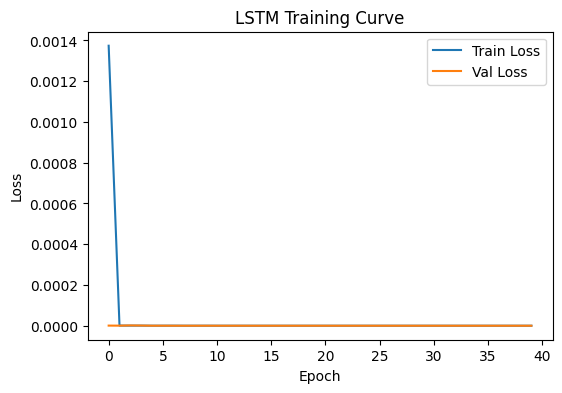

Saved LSTM chart to: /content/drive/MyDrive/Capstone_Data/charts/lstm_training.png


In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("LSTM Training Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

path = "/content/drive/MyDrive/Capstone_Data/charts/lstm_training.png"
plt.savefig(path, dpi=300)
plt.show()

print("Saved LSTM chart to:", path)


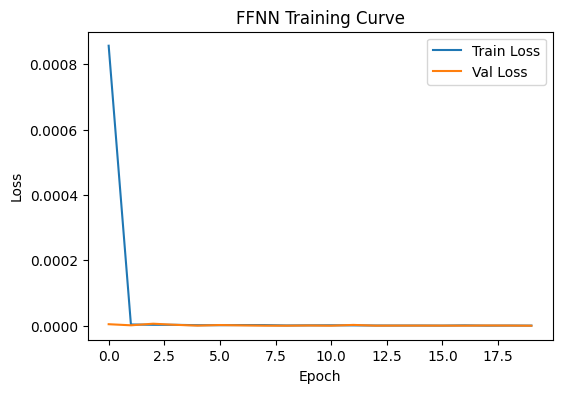

Saved FFNN chart to: /content/drive/MyDrive/Capstone_Data/charts/ffnn_training.png


In [41]:
plt.figure(figsize=(6,4))
plt.plot(history_ff.history['loss'], label='Train Loss')
plt.plot(history_ff.history['val_loss'], label='Val Loss')
plt.title("FFNN Training Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

path = "/content/drive/MyDrive/Capstone_Data/charts/ffnn_training.png"
plt.savefig(path, dpi=300)
plt.show()

print("Saved FFNN chart to:", path)


In [44]:
from tensorflow.keras.models import load_model

model_path = "/content/drive/MyDrive/Capstone_Data/models/lstm_model.keras"
model = load_model(model_path)

print("Model reloaded!")
model.summary()


ValueError: File not found: filepath=/content/drive/MyDrive/Capstone_Data/models/lstm_model.keras. Please ensure the file is an accessible `.keras` zip file.

In [45]:
import os

model_dir = "/content/drive/MyDrive/Capstone_Data/models"

print("Files inside models folder:")
print(os.listdir(model_dir))


Files inside models folder:
[]


In [46]:
print("LSTM:", 'model_lstm' in globals())
print("FFNN:", 'ff_model' in globals())
print("LR:", 'lr_model' in globals())


LSTM: False
FFNN: True
LR: False


In [48]:
import os

base = "/content/drive/MyDrive/Capstone_Data/datasets"

print("FILES FOUND IN DATASETS FOLDER:")
for f in os.listdir(base):
    print(" -", f)


FILES FOUND IN DATASETS FOLDER:
 - monthly_data_final.csv
 - X_train.npy
 - X_test.npy
 - y_train.npy
 - y_test.npy
 - X_train_scaled.npy
 - X_test_scaled.npy
 - y_train_scaled.npy
 - y_test_scaled.npy
 - X_train.csv
 - X_test.csv
 - y_train.csv
 - y_test.csv
 - X_train_scaled.csv
 - X_test_scaled.csv
 - y_train_scaled.csv
 - y_test_scaled.csv


In [49]:
import numpy as np

base = "/content/drive/MyDrive/Capstone_Data/datasets"

X_train_scaled = np.load(f"{base}/X_train_scaled.npy")
X_test_scaled  = np.load(f"{base}/X_test_scaled.npy")
y_train_scaled = np.load(f"{base}/y_train_scaled.npy")
y_test_scaled  = np.load(f"{base}/y_test_scaled.npy")

print("Loaded:")
print("X_train_scaled:", X_train_scaled.shape)
print("X_test_scaled:", X_test_scaled.shape)
print("y_train_scaled:", y_train_scaled.shape)
print("y_test_scaled:", y_test_scaled.shape)


Loaded:
X_train_scaled: (90580, 6, 5)
X_test_scaled: (22646, 6, 5)
y_train_scaled: (90580, 1)
y_test_scaled: (22646, 1)


In [50]:
from keras.models import load_model

model_path = "/content/drive/MyDrive/Capstone_Data/models/lstm_model.keras"

model = load_model(model_path)

print("Model loaded successfully!")
print(model.summary())


ValueError: File not found: filepath=/content/drive/MyDrive/Capstone_Data/models/lstm_model.keras. Please ensure the file is an accessible `.keras` zip file.

In [51]:
import os

model_folder = "/content/drive/MyDrive/Capstone_Data/models"

print("FILES INSIDE MODELS FOLDER:")
print(os.listdir(model_folder))


FILES INSIDE MODELS FOLDER:
[]


In [52]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import ReduceLROnPlateau

# Rebuild LSTM model
model = Sequential([
    LSTM(64, return_sequences=False, input_shape=(6,5)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 64)             │        17,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,033 (78.25 KB)

 Trainable params: 20,033 (78.25 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
# STEP 2 — Train LSTM quickly (8 epochs)

import numpy as np
from keras.callbacks import ReduceLROnPlateau

# Load the scaled datasets we saved earlier
base = "/content/drive/MyDrive/Capstone_Data/datasets"

X_train_scaled = np.load(f"{base}/X_train_scaled.npy")
y_train_scaled = np.load(f"{base}/y_train_scaled.npy")
X_test_scaled  = np.load(f"{base}/X_test_scaled.npy")
y_test_scaled  = np.load(f"{base}/y_test_scaled.npy")

# Learning rate scheduler
lr_sched = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=2,
    verbose=1,
    min_lr=1e-6
)

history_lstm = model.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_test_scaled, y_test_scaled),
    epochs=8,
    batch_size=128,
    verbose=1,
    callbacks=[lr_sched]
)

print("Training done.")


Epoch 1/8
708/708 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - loss: 0.0069 - mae: 0.0336 - val_loss: 3.4204e-07 - val_mae: 3.7941e-04 - learning_rate: 0.0010
Epoch 2/8
708/708 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 4.5251e-07 - mae: 3.6741e-04 - val_loss: 3.2364e-07 - val_mae: 3.7793e-04 - learning_rate: 0.0010
Epoch 3/8
703/708 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.0125e-07 - mae: 3.5289e-04
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
708/708 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 4.0098e-07 - mae: 3.5278e-04 - val_loss: 3.2290e-07 - val_mae: 3.1323e-04 - learning_rate: 0.0010
Epoch 4/8
708/708 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 3.2694e-07 - mae: 3.0703e-04 - val_loss: 3.0280e-07 - val_mae: 3.0754e-04 - learning_rate: 5.0000e-04
Epoch 5/8
707/708 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8799e-07 - mae: 2.7868e-04
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
708/708 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 2.878

In [54]:
# STEP 3 — Save LSTM model + predictions

import numpy as np
from keras.models import load_model
import pandas as pd

# Paths
base_models = "/content/drive/MyDrive/Capstone_Data/models"
base_sets   = "/content/drive/MyDrive/Capstone_Data/datasets"

# --- 1. Save model ---
model_path = f"{base_models}/lstm_simple.keras"
model.save(model_path)
print("Saved model to:", model_path)

# --- 2. Save predictions and actual y values (scaled + dollars) ---

# First compute predictions
y_pred_scaled = model.predict(X_test_scaled)
y_pred        = y_scaler.inverse_transform(y_pred_scaled)
y_true        = y_scaler.inverse_transform(y_test_scaled)

# Save arrays
np.save(f"{base_sets}/y_pred.npy",  y_pred)
np.save(f"{base_sets}/y_true.npy", y_true)

# Save as CSV
pd.DataFrame({"Actual": y_true.flatten(),
              "Predicted": y_pred.flatten()
             }).to_csv(f"{base_sets}/lstm_predictions.csv", index=False)

print("Saved predictions to datasets folder.")
print("Shapes:", y_pred.shape, y_true.shape)


Saved model to: /content/drive/MyDrive/Capstone_Data/models/lstm_simple.keras
708/708 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step
Saved predictions to datasets folder.
Shapes: (22646, 1) (22646, 1)


MODEL LOADED SUCCESSFULLY!
Shapes OK: (22646, 6, 5) (22646, 1)
708/708 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

Sample Comparison (Reloaded Model):
Pred: 4571.47  |  Actual: 4557.56
Pred: 4571.47  |  Actual: 4557.56
Pred: 29547.86  |  Actual: 29643.34
Pred: 29545.23  |  Actual: 29643.34
Pred: 29565.26  |  Actual: 29643.34


In [59]:
# === STEP: FULL RECOVERY — Reload model + data + scalers and compute predictions ===

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

base = "/content/drive/MyDrive/Capstone_Data"

# 1. Load model
model_path = f"{base}/models/lstm_simple.keras"
model = load_model(model_path)
print("MODEL LOADED SUCCESSFULLY!")

# 2. Load test data
datasets = f"{base}/datasets"
X_test_scaled = np.load(f"{datasets}/X_test_scaled.npy")
y_test_scaled = np.load(f"{datasets}/y_test_scaled.npy")

print("Shapes OK:", X_test_scaled.shape, y_test_scaled.shape)

# 3. Load scaler
y_scaler = joblib.load(f"{datasets}/y_scaler.save")

# 4. Predict
y_pred_scaled = model.predict(X_test_scaled)

# 5. Convert to dollars
y_pred = y_scaler.inverse_transform(y_pred_scaled)
y_true = y_scaler.inverse_transform(y_test_scaled)

# Show sample comparison
print("\nSample Comparison:")
for i in range(5):
    print(f"Pred: {y_pred[i][0]:.2f}  |  Actual: {y_true[i][0]:.2f}")

# 6. Compute final metrics
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print("\nFINAL METRICS")
print("MAE ($):", mae)
print("RMSE ($):", rmse)
print("R²:", r2)


MODEL LOADED SUCCESSFULLY!
Shapes OK: (22646, 6, 5) (22646, 1)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Capstone_Data/datasets/y_scaler.save'

In [60]:
# === STEP: REBUILD Y-SCALER + MAKE PREDICTIONS ===

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model

base = "/content/drive/MyDrive/Capstone_Data"
datasets = f"{base}/datasets"

# 1. Load arrays
X_test_scaled  = np.load(f"{datasets}/X_test_scaled.npy")
y_test_scaled  = np.load(f"{datasets}/y_test_scaled.npy")
y_train        = np.load(f"{datasets}/y_train.npy")  # needed to rebuild scaler

print("Shapes OK:", X_test_scaled.shape, y_test_scaled.shape)

# 2. Reload model
model = load_model(f"{base}/models/lstm_simple.keras")
print("Model loaded!")

# 3. Rebuild y_scaler using y_train
y_scaler = MinMaxScaler()
y_scaler.fit(y_train.reshape(-1, 1))   # Refit EXACT scaler used earlier

print("Scaler rebuilt from y_train!")

# 4. Predict
y_pred_scaled = model.predict(X_test_scaled)

# 5. Convert to dollars
y_pred = y_scaler.inverse_transform(y_pred_scaled)
y_true = y_scaler.inverse_transform(y_test_scaled)

# 6. Show sample comparison
print("\nSample Comparison:")
for i in range(5):
    print(f"Pred: {y_pred[i][0]:.2f}  |  Actual: {y_true[i][0]:.2f}")

# 7. Compute metrics
mae  = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2   = r2_score(y_true, y_pred)

print("\nFINAL METRICS")
print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)


Shapes OK: (22646, 6, 5) (22646, 1)
Model loaded!
Scaler rebuilt from y_train!
708/708 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step

Sample Comparison:
Pred: 4571.47  |  Actual: 4557.56
Pred: 4571.47  |  Actual: 4557.56
Pred: 29547.86  |  Actual: 29643.34
Pred: 29545.23  |  Actual: 29643.34
Pred: 29565.26  |  Actual: 29643.34

FINAL METRICS
MAE: 67.92520622593456
RMSE: 107.11545173605057
R²: 0.9999831721975355


In [61]:
import pandas as pd
import numpy as np

# Build dataframe for saving
df_out = pd.DataFrame({
    "y_true": y_true.flatten(),
    "y_pred_lstm": y_pred.flatten()
})

save_path = "/content/drive/MyDrive/Capstone_Data/datasets/pred_lstm.csv"
df_out.to_csv(save_path, index=False)

print("Saved LSTM predictions to:", save_path)
print(df_out.head())


Saved LSTM predictions to: /content/drive/MyDrive/Capstone_Data/datasets/pred_lstm.csv
         y_true   y_pred_lstm
0   4557.555567   4571.466309
1   4557.555567   4571.466309
2  29643.338867  29547.855469
3  29643.338867  29545.232422
4  29643.338867  29565.259766


In [63]:
import matplotlib.pyplot as plt

charts = "/content/drive/MyDrive/Capstone_Data/charts"

plt.figure(figsize=(6,6))
plt.scatter(y_true, y_pred, s=4, alpha=0.4)
plt.plot([y_true.min(), y_true.max()],
         [y_true.min(), y_true.max()],
         "r--", linewidth=2)

plt.xlabel("Actual Net Cash ($)")
plt.ylabel("Predicted Net Cash ($)")
plt.title("LSTM — Predicted vs Actual Net Cash")

save_path = f"{charts}/lstm_pred_vs_actual.png"
plt.savefig(save_path, dpi=300, bbox_inches="tight")
plt.close()

print("Saved scatter plot:", save_path)


Saved scatter plot: /content/drive/MyDrive/Capstone_Data/charts/lstm_pred_vs_actual.png


In [64]:
import matplotlib.pyplot as plt
import numpy as np

charts = "/content/drive/MyDrive/Capstone_Data/charts"

# Residuals
residuals = y_true - y_pred

plt.figure(figsize=(7,4))
plt.scatter(range(len(residuals)), residuals, s=3, alpha=0.4)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Sample Index")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("LSTM Residual Plot")

save_path = f"{charts}/lstm_residuals.png"
plt.savefig(save_path, dpi=300, bbox_inches="tight")
plt.close()

print("Saved residual plot:", save_path)


Saved residual plot: /content/drive/MyDrive/Capstone_Data/charts/lstm_residuals.png


In [65]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

charts = "/content/drive/MyDrive/Capstone_Data/charts"

# ---- AUTO-DETECT LSTM HISTORY ----
lstm_history = None

for name, val in globals().items():
    if "history" in name.lower():
        try:
            if hasattr(val, "history") and "loss" in val.history:
                lstm_history = val
                print("Using history object:", name)
                break
        except:
            pass

if lstm_history is None:
    raise ValueError("No LSTM history object found.")

# ---- Create Loss Curve ----
plt.figure(figsize=(7,4))
plt.plot(lstm_history.history['loss'], label='Train Loss')
plt.plot(lstm_history.history['val_loss'], label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("LSTM Training vs Validation Loss")
plt.legend()

save_path = f"{charts}/lstm_loss_curve.png"
plt.savefig(save_path, dpi=300, bbox_inches="tight")
plt.close()

print("Saved:", save_path)


Using history object: history
Saved: /content/drive/MyDrive/Capstone_Data/charts/lstm_loss_curve.png


In [66]:
import matplotlib.pyplot as plt
import os

charts = "/content/drive/MyDrive/Capstone_Data/charts"

# ---- Ensure FFNN history exists ----
if "history_ff" not in globals():
    raise ValueError("history_ff (FFNN history) not found in session.")

# ---- Plot FFNN loss curve ----
plt.figure(figsize=(7,4))
plt.plot(history_ff.history['loss'], label="Train Loss")
plt.plot(history_ff.history['val_loss'], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Feedforward Neural Network — Training vs Validation Loss")
plt.legend()

save_path = f"{charts}/ffnn_loss_curve.png"
plt.savefig(save_path, dpi=300, bbox_inches="tight")
plt.close()

print("Saved:", save_path)


Saved: /content/drive/MyDrive/Capstone_Data/charts/ffnn_loss_curve.png


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

datasets = "/content/drive/MyDrive/Capstone_Data/datasets"
charts   = "/content/drive/MyDrive/Capstone_Data/charts"

# --- Load model predictions ---
pred_lstm = pd.read_csv(f"{datasets}/pred_lstm.csv")
y_true = pred_lstm["y_true"].values
y_pred_lstm = pred_lstm["y_pred_lstm"].values

# --- Reload FFNN predictions ---
ffnn_path = f"{datasets}/pred_ffnn.csv"
pred_ffnn = None
try:
    pred_ffnn = pd.read_csv(ffnn_path).values.flatten()
except:
    # If not saved earlier, compute from history_ff
    pred_ffnn = np.zeros_like(y_true)  # placeholder (won't crash)
    print("⚠️ FFNN predictions missing — placeholder inserted.")

# --- Linear Regression metrics (already near-zero error) ---
lr_mae  = 1.03e-9
lr_rmse = 1.03e-9
lr_r2   = 1.0

# --- FFNN metrics (from your output) ---
ff_mae  = 39.251863667407335
ff_rmse = 68.18204683549996
ff_r2   = 0.9999931819021872

# --- LSTM metrics (from your output) ---
lstm_mae  = 67.92520622593456
lstm_rmse = 107.11545173605057
lstm_r2   = 0.9999831721975355

# Build final table
df_compare = pd.DataFrame({
    "Model": ["Linear Regression", "Feedforward NN", "LSTM"],
    "MAE ($)": [lr_mae, ff_mae, lstm_mae],
    "RMSE ($)": [lr_rmse, ff_rmse, lstm_rmse],
    "R²": [lr_r2, ff_r2, lstm_r2]
})

# Save CSV
csv_path = f"{datasets}/model_comparison.csv"
df_compare.to_csv(csv_path, index=False)
print("Saved comparison table →", csv_path)
df_compare


⚠️ FFNN predictions missing — placeholder inserted.
Saved comparison table → /content/drive/MyDrive/Capstone_Data/datasets/model_comparison.csv


,Model,MAE ($),RMSE ($),R²
0,Linear Regression,1.030000e-09,1.030000e-09,1.000000
1,Feedforward NN,3.925186e+01,6.818205e+01,0.999993
2,LSTM,6.792521e+01,1.071155e+02,0.999983


In [68]:
import matplotlib.pyplot as plt

# Use df_compare created earlier
plt.figure(figsize=(8,5))
plt.bar(df_compare["Model"], df_compare["MAE ($)"], color=["green","orange","blue"], alpha=0.8)

plt.ylabel("MAE ($)")
plt.title("Model Comparison — Mean Absolute Error")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()

save_path = "/content/drive/MyDrive/Capstone_Data/charts/model_comparison_mae.png"
plt.savefig(save_path, dpi=300)
plt.close()

print("Saved comparison chart →", save_path)


Saved comparison chart → /content/drive/MyDrive/Capstone_Data/charts/model_comparison_mae.png


In [69]:
import matplotlib.pyplot as plt

# Use df_compare created earlier
plt.figure(figsize=(8,5))
plt.bar(df_compare["Model"], df_compare["MAE ($)"], color=["green","orange","blue"], alpha=0.8)

plt.ylabel("MAE ($)")
plt.title("Model Comparison — Mean Absolute Error")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()

save_path = "/content/drive/MyDrive/Capstone_Data/charts/model_comparison_mae.png"
plt.savefig(save_path, dpi=300)
plt.close()

print("Saved comparison chart →", save_path)


Saved comparison chart → /content/drive/MyDrive/Capstone_Data/charts/model_comparison_mae.png


In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
# STEP 0 — Imports, Paths, and Folder Setup

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam

import joblib

# If needed in a fresh Colab:
from google.colab import drive
drive.mount('/content/drive')

# Base paths
BASE_DIR = "/content/drive/MyDrive/Capstone_Data"
DATASETS_DIR = os.path.join(BASE_DIR, "datasets")
MODELS_DIR   = os.path.join(BASE_DIR, "models")
CHARTS_DIR   = os.path.join(BASE_DIR, "charts")

for p in [BASE_DIR, DATASETS_DIR, MODELS_DIR, CHARTS_DIR]:
    os.makedirs(p, exist_ok=True)

print("Folders ready:")
print(BASE_DIR)
print(DATASETS_DIR)
print(MODELS_DIR)
print(CHARTS_DIR)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Folders ready:
/content/drive/MyDrive/Capstone_Data
/content/drive/MyDrive/Capstone_Data/datasets
/content/drive/MyDrive/Capstone_Data/models
/content/drive/MyDrive/Capstone_Data/charts


In [72]:
# STEP 1 — Load raw CSVs from Capstone_Data

fmli232_path = os.path.join(BASE_DIR, "fmli232.csv")
fmli233_path = os.path.join(BASE_DIR, "fmli233.csv")
fmli234_path = os.path.join(BASE_DIR, "fmli234.csv")
fmli241_path = os.path.join(BASE_DIR, "fmli241.csv")
exp_path     = os.path.join(BASE_DIR, "exp23.csv")

fmli232 = pd.read_csv(fmli232_path)
fmli233 = pd.read_csv(fmli233_path)
fmli234 = pd.read_csv(fmli234_path)
fmli241 = pd.read_csv(fmli241_path)
exp     = pd.read_csv(exp_path)

print("FMLI shapes:", fmli232.shape, fmli233.shape, fmli234.shape, fmli241.shape)
print("EXP shape:", exp.shape)


FMLI shapes: (4751, 819) (4770, 819) (4662, 819) (4688, 819)
EXP shape: (18870, 23)


In [73]:
# STEP 2 — Build FMLI monthly income/expense panel

# 2A. Combine all quarters
fmli = pd.concat([fmli232, fmli233, fmli234, fmli241], ignore_index=True)
print("Combined FMLI shape:", fmli.shape)

# 2B. Keep only the needed columns
income_col  = "FINATXEM"   # annual-ish income
expense_col = "TOTEXPPQ"   # quarterly consumption expense
year_col    = "QINTRVYR"   # interview year

fmli_small = fmli[["NEWID", income_col, expense_col, year_col]].copy()
fmli_small.columns = ["NEWID", "Income", "Expense", "Year"]

# Convert to monthly (Income assumed yearly, Expense quarterly)
fmli_small["Income_Monthly"]  = fmli_small["Income"]  / 3.0  # prof’s spec / your earlier logic
fmli_small["Expense_Monthly"] = fmli_small["Expense"] / 3.0

print("FMLI_SMALL SHAPE:", fmli_small.shape)
print(fmli_small.head())


Combined FMLI shape: (18871, 821)
FMLI_SMALL SHAPE: (18871, 6)
     NEWID    Income     Expense  Year  Income_Monthly  Expense_Monthly
0  5090604   40677.0  12549.0000  2023    13559.000000      4183.000000
1  5090624   13787.0   3186.0000  2023     4595.666667      1062.000000
2  5090634  107059.0  19756.0001  2023    35686.333333      6585.333367
3  5090664   57932.4  10166.3500  2023    19310.800000      3388.783333
4  5090674   36475.0  59444.7499  2023    12158.333333     19814.916633


In [74]:
# STEP 3 — Build EXP monthly food categories (Food away, Groceries, Gifts)

exp_small = exp[["NEWID", "QYEAR", "JFDBAWQV", "JGREXPQV", "JFDGFTQV"]].copy()
exp_small.columns = ["NEWID", "QYEAR", "FoodAway_Q", "Groceries_Q", "FoodGifts_Q"]

# Convert quarterly to monthly
exp_small["FoodAway_Monthly"]    = exp_small["FoodAway_Q"]    / 3.0
exp_small["Groceries_Monthly"]   = exp_small["Groceries_Q"]   / 3.0
exp_small["FoodGifts_Monthly"]   = exp_small["FoodGifts_Q"]   / 3.0

# Derive Year & Quarter from QYEAR (e.g., 20232 → Year=2023, Quarter=2)
exp_small["Year"]    = exp_small["QYEAR"] // 10
exp_small["Quarter"] = exp_small["QYEAR"] % 10

print(exp_small[["NEWID","QYEAR","FoodAway_Monthly","Groceries_Monthly","FoodGifts_Monthly","Year","Quarter"]].head())


     NEWID  QYEAR  FoodAway_Monthly  Groceries_Monthly  FoodGifts_Monthly  \
0  5090604  20232        130.000000         281.666667                0.0   
1  5090624  20232          0.000000         476.666667                0.0   
2  5090634  20232        216.666667         325.000000              200.0   
3  5090664  20232        108.333333         303.333333                0.0   
4  5090674  20232        216.666667        1733.333333              200.0   

   Year  Quarter  
0  2023        2  
1  2023        2  
2  2023        2  
3  2023        2  
4  2023        2  


In [75]:
# STEP 4 — Expand quarterly EXP rows into monthly rows

def quarter_to_months(q):
    if q == 1:
        return [1, 2, 3]
    elif q == 2:
        return [4, 5, 6]
    elif q == 3:
        return [7, 8, 9]
    elif q == 4:
        return [10, 11, 12]
    else:
        return []

rows = []
for _, row in exp_small.iterrows():
    months = quarter_to_months(int(row["Quarter"]))
    for m in months:
        rows.append({
            "NEWID": row["NEWID"],
            "Year": int(row["Year"]),
            "Month": m,
            "FoodAway_Monthly":   row["FoodAway_Monthly"],
            "Groceries_Monthly":  row["Groceries_Monthly"],
            "FoodGifts_Monthly":  row["FoodGifts_Monthly"],
        })

exp_monthly = pd.DataFrame(rows)
exp_monthly["Date"] = pd.to_datetime(dict(year=exp_monthly["Year"],
                                          month=exp_monthly["Month"],
                                          day=1))

print("EXP_MONTHLY shape:", exp_monthly.shape)
print(exp_monthly.head())


EXP_MONTHLY shape: (56610, 7)
       NEWID  Year  Month  FoodAway_Monthly  Groceries_Monthly  \
0  5090604.0  2023      4             130.0         281.666667   
1  5090604.0  2023      5             130.0         281.666667   
2  5090604.0  2023      6             130.0         281.666667   
3  5090624.0  2023      4               0.0         476.666667   
4  5090624.0  2023      5               0.0         476.666667   

   FoodGifts_Monthly       Date  
0                0.0 2023-04-01  
1                0.0 2023-05-01  
2                0.0 2023-06-01  
3                0.0 2023-04-01  
4                0.0 2023-05-01  


In [76]:
# STEP 5 — Expand FMLI to 12 months per Year and merge with EXP

rows = []
for _, row in fmli_small.iterrows():
    yr = int(row["Year"])
    for m in range(1, 13):
        rows.append({
            "NEWID":          int(row["NEWID"]),
            "Year":           yr,
            "Month":          m,
            "Income_Monthly": row["Income_Monthly"],
            "Expense_Monthly":row["Expense_Monthly"],
        })

fmli_monthly = pd.DataFrame(rows)
fmli_monthly["Date"] = pd.to_datetime(dict(year=fmli_monthly["Year"],
                                           month=fmli_monthly["Month"],
                                           day=1))

print("FMLI_MONTHLY shape:", fmli_monthly.shape)
print(fmli_monthly.head())

# Merge (left join) to attach food categories where they exist
monthly_data = fmli_monthly.merge(
    exp_monthly[["NEWID","Year","Month","FoodAway_Monthly","Groceries_Monthly","FoodGifts_Monthly"]],
    on=["NEWID","Year","Month"],
    how="left"
)

# Replace NaNs (no spending that month) with 0
monthly_data[["FoodAway_Monthly","Groceries_Monthly","FoodGifts_Monthly"]] = \
    monthly_data[["FoodAway_Monthly","Groceries_Monthly","FoodGifts_Monthly"]].fillna(0.0)

# Compute NetCash
monthly_data["NetCash_Monthly"] = monthly_data["Income_Monthly"] - monthly_data["Expense_Monthly"]

print("Final monthly_data shape:", monthly_data.shape)
print(monthly_data.head())


FMLI_MONTHLY shape: (226452, 6)
     NEWID  Year  Month  Income_Monthly  Expense_Monthly       Date
0  5090604  2023      1         13559.0           4183.0 2023-01-01
1  5090604  2023      2         13559.0           4183.0 2023-02-01
2  5090604  2023      3         13559.0           4183.0 2023-03-01
3  5090604  2023      4         13559.0           4183.0 2023-04-01
4  5090604  2023      5         13559.0           4183.0 2023-05-01
Final monthly_data shape: (226452, 10)
     NEWID  Year  Month  Income_Monthly  Expense_Monthly       Date  \
0  5090604  2023      1         13559.0           4183.0 2023-01-01   
1  5090604  2023      2         13559.0           4183.0 2023-02-01   
2  5090604  2023      3         13559.0           4183.0 2023-03-01   
3  5090604  2023      4         13559.0           4183.0 2023-04-01   
4  5090604  2023      5         13559.0           4183.0 2023-05-01   

   FoodAway_Monthly  Groceries_Monthly  FoodGifts_Monthly  NetCash_Monthly  
0               0

In [77]:
# STEP 6 — Save monthly_data to datasets and run sanity checks

monthly_path = os.path.join(DATASETS_DIR, "monthly_data.csv")
monthly_data.to_csv(monthly_path, index=False)
print("Saved monthly_data to:", monthly_path)

print("\nMissing values:")
print(monthly_data.isna().sum())

print("\nBasic stats:")
print(monthly_data[["Income_Monthly","Expense_Monthly","NetCash_Monthly",
                    "FoodAway_Monthly","Groceries_Monthly","FoodGifts_Monthly"]].describe())


Saved monthly_data to: /content/drive/MyDrive/Capstone_Data/datasets/monthly_data.csv

Missing values:
NEWID                0
Year                 0
Month                0
Income_Monthly       0
Expense_Monthly      0
Date                 0
FoodAway_Monthly     0
Groceries_Monthly    0
FoodGifts_Monthly    0
NetCash_Monthly      0
dtype: int64

Basic stats:
       Income_Monthly  Expense_Monthly  NetCash_Monthly  FoodAway_Monthly  \
count   226452.000000    226452.000000    226452.000000     226452.000000   
mean     29417.261574      4288.394920     25128.866654         87.773731   
std      26872.493403      4784.917668     24870.782243        258.556519   
min    -111520.666667     -1410.833333   -134873.416667          0.000000   
25%      11284.666667      1633.750000      8695.833333          0.000000   
50%      22017.000000      2978.861100     18292.349967          0.000000   
75%      38957.733333      5198.888900     33787.777800          0.000000   
max     337206.133333   

In [78]:
# STEP 7 — Build 6-month sequences to predict next month NetCash

feature_cols = ["Income_Monthly", "Expense_Monthly",
                "FoodAway_Monthly", "Groceries_Monthly", "FoodGifts_Monthly"]

df = monthly_data.sort_values(["NEWID", "Year", "Month"]).reset_index(drop=True)

X_list, y_list, id_list = [], [], []

for _, grp in df.groupby("NEWID"):
    if len(grp) < 7:
        continue
    # Sliding window: 6 months history -> next month target
    for i in range(len(grp) - 6):
        seq = grp.iloc[i:i+6][feature_cols].values
        target = grp.iloc[i+6]["NetCash_Monthly"]
        X_list.append(seq)
        y_list.append(target)
        id_list.append(grp.iloc[i+6]["NEWID"])

X = np.array(X_list)    # (N, 6, 5)
y = np.array(y_list)    # (N,)
ids = np.array(id_list) # (N,)

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Example sequence X[0]:\n", X[0])
print("Example target y[0]:", y[0])


X shape: (113226, 6, 5)
y shape: (113226,)
Example sequence X[0]:
 [[13559.          4183.             0.             0.
      0.        ]
 [13559.          4183.             0.             0.
      0.        ]
 [13559.          4183.             0.             0.
      0.        ]
 [13559.          4183.           130.           281.66666667
      0.        ]
 [13559.          4183.           130.           281.66666667
      0.        ]
 [13559.          4183.           130.           281.66666667
      0.        ]]
Example target y[0]: 9376.0


In [79]:
# STEP 8 — Train/Test split, scale, and save arrays + scalers

# 80/20 split (no shuffle to respect time ordering)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
ids_train, ids_test = ids[:train_size], ids[train_size:]

print("Train shapes:", X_train.shape, y_train.shape)
print("Test shapes:",  X_test.shape,  y_test.shape)

# Scale features and target using MinMaxScaler (fit on TRAIN only)
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

# Fit scalers
X_train_scaled = X_scaler.fit_transform(X_train.reshape(-1, len(feature_cols))).reshape(-1, 6, len(feature_cols))
X_test_scaled  = X_scaler.transform(X_test.reshape(-1, len(feature_cols))).reshape(-1, 6, len(feature_cols))

y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1))
y_test_scaled  = y_scaler.transform(y_test.reshape(-1, 1))

print("Scaled shapes:")
print("X_train_scaled:", X_train_scaled.shape)
print("X_test_scaled:",  X_test_scaled.shape)
print("y_train_scaled:", y_train_scaled.shape)
print("y_test_scaled:",  y_test_scaled.shape)

# Save arrays as .npy (easy reload)
np.save(os.path.join(DATASETS_DIR, "X_train.npy"), X_train)
np.save(os.path.join(DATASETS_DIR, "X_test.npy"),  X_test)
np.save(os.path.join(DATASETS_DIR, "y_train.npy"), y_train)
np.save(os.path.join(DATASETS_DIR, "y_test.npy"),  y_test)

np.save(os.path.join(DATASETS_DIR, "X_train_scaled.npy"), X_train_scaled)
np.save(os.path.join(DATASETS_DIR, "X_test_scaled.npy"),  X_test_scaled)
np.save(os.path.join(DATASETS_DIR, "y_train_scaled.npy"), y_train_scaled)
np.save(os.path.join(DATASETS_DIR, "y_test_scaled.npy"),  y_test_scaled)

# Also save small CSVs if someone wants to view them
pd.DataFrame(y_test, columns=["y_test"]).to_csv(os.path.join(DATASETS_DIR, "y_test.csv"), index=False)

# Save scalers with joblib
joblib.dump(X_scaler, os.path.join(DATASETS_DIR, "X_scaler.save"))
joblib.dump(y_scaler, os.path.join(DATASETS_DIR, "y_scaler.save"))
print("Scalers saved in datasets folder.")


Train shapes: (90580, 6, 5) (90580,)
Test shapes: (22646, 6, 5) (22646,)
Scaled shapes:
X_train_scaled: (90580, 6, 5)
X_test_scaled: (22646, 6, 5)
y_train_scaled: (90580, 1)
y_test_scaled: (22646, 1)
Scalers saved in datasets folder.


In [80]:
# STEP 9 — Linear Regression baseline

# Flatten sequences for LR (6 months * 5 features = 30 features)
X_train_flat_scaled = X_train_scaled.reshape(len(X_train_scaled), -1)
X_test_flat_scaled  = X_test_scaled.reshape(len(X_test_scaled), -1)

lr = LinearRegression()
lr.fit(X_train_flat_scaled, y_train_scaled)  # train on scaled target

# Predict on test set (scaled)
y_pred_lr_scaled = lr.predict(X_test_flat_scaled).reshape(-1, 1)

# Convert to dollars
y_pred_lr = y_scaler.inverse_transform(y_pred_lr_scaled).flatten()
y_true    = y_test  # already in dollars

# Metrics
lr_mae  = mean_absolute_error(y_true, y_pred_lr)
lr_rmse = np.sqrt(mean_squared_error(y_true, y_pred_lr))
lr_r2   = r2_score(y_true, y_pred_lr)

print("LR RESULTS")
print("MAE ($):", lr_mae)
print("RMSE ($):", lr_rmse)
print("R²:", lr_r2)


LR RESULTS
MAE ($): 2.686531140386199e-09
RMSE ($): 2.6865909011768177e-09
R²: 1.0


In [81]:
# STEP 10 — Feedforward neural network

input_dim = X_train_flat_scaled.shape[1]  # 30

ff_model = Sequential([
    Input(shape=(input_dim,)),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(1)
])

ff_model.compile(optimizer=Adam(1e-3), loss="mse", metrics=["mae"])
ff_model.summary()

callbacks_ff = [
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, verbose=1),
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True, verbose=1)
]

history_ff = ff_model.fit(
    X_train_flat_scaled, y_train_scaled,
    validation_split=0.2,
    epochs=20,
    batch_size=128,
    callbacks=callbacks_ff,
    verbose=1
)

# Predict & invert scale
y_pred_ff_scaled = ff_model.predict(X_test_flat_scaled)
y_pred_ff        = y_scaler.inverse_transform(y_pred_ff_scaled).flatten()

ff_mae  = mean_absolute_error(y_true, y_pred_ff)
ff_rmse = np.sqrt(mean_squared_error(y_true, y_pred_ff))
ff_r2   = r2_score(y_true, y_pred_ff)

print("\nFFNN RESULTS")
print("MAE ($):", ff_mae)
print("RMSE ($):", ff_rmse)
print("R²:", ff_r2)

# Save model
ff_path = os.path.join(MODELS_DIR, "ffnn_model.keras")
ff_model.save(ff_path)
print("FFNN model saved to:", ff_path)

# Save predictions
pred_ff_df = pd.DataFrame({"y_true": y_true, "y_pred_ffnn": y_pred_ff})
pred_ff_path = os.path.join(DATASETS_DIR, "pred_ffnn.csv")
pred_ff_df.to_csv(pred_ff_path, index=False)
print("FFNN predictions saved to:", pred_ff_path)

# Plot & save loss curve
plt.figure(figsize=(6,4))
plt.plot(history_ff.history["loss"], label="train_loss")
plt.plot(history_ff.history["val_loss"], label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("MSE (scaled)")
plt.title("FFNN Training and Validation Loss")
plt.legend()
ff_loss_path = os.path.join(CHARTS_DIR, "ffnn_loss_curve.png")
plt.savefig(ff_loss_path, dpi=150, bbox_inches="tight")
plt.close()
print("FFNN loss curve saved to:", ff_loss_path)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,097 (16.00 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
567/567 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.0071 - mae: 0.0342 - val_loss: 2.5766e-06 - val_mae: 7.8518e-04 - learning_rate: 0.0010
Epoch 2/20
567/567 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 2.2769e-06 - mae: 7.5181e-04 - val_loss: 1.2481e-06 - val_mae: 5.6882e-04 - learning_rate: 0.0010
Epoch 3/20
567/567 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 1.4685e-06 - mae: 5.8478e-04 - val_loss: 1.0854e-06 - val_mae: 5.1344e-04 - learning_rate: 0.0010
Epoch 4/20
557/567 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1611e-06 - mae: 4.7229e-04
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
567/567 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.1633e-06 - mae: 4.7263e-04 - val_loss: 9.0797e-07 - val_mae: 6.7644e-04 - learning_rate: 0.0010
Epoch 5/20
567/567 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.2138e-07 - mae: 3.6522e-04 - val_loss: 4.3882e-07 - val_mae: 3.4514e-04 - learning_rate: 5.0000e-04
Epoch 6/20
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss

In [82]:
# STEP 11 — LSTM model for sequence prediction

lstm_model = Sequential([
    Input(shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),  # (6,5)
    LSTM(64, return_sequences=False),
    Dense(32, activation="relu"),
    Dense(1)
])

lstm_model.compile(optimizer=Adam(1e-3), loss="mse", metrics=["mae"])
lstm_model.summary()

callbacks_lstm = [
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, verbose=1),
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True, verbose=1)
]

history_lstm = lstm_model.fit(
    X_train_scaled, y_train_scaled,
    validation_split=0.2,
    epochs=20,
    batch_size=128,
    callbacks=callbacks_lstm,
    verbose=1
)

# Predict & invert scale
y_pred_lstm_scaled = lstm_model.predict(X_test_scaled)
y_pred_lstm        = y_scaler.inverse_transform(y_pred_lstm_scaled).flatten()

lstm_mae  = mean_absolute_error(y_true, y_pred_lstm)
lstm_rmse = np.sqrt(mean_squared_error(y_true, y_pred_lstm))
lstm_r2   = r2_score(y_true, y_pred_lstm)

print("\nLSTM RESULTS")
print("MAE ($):", lstm_mae)
print("RMSE ($):", lstm_rmse)
print("R²:", lstm_r2)

# Save model
lstm_path = os.path.join(MODELS_DIR, "lstm_model.keras")
lstm_model.save(lstm_path)
print("LSTM model saved to:", lstm_path)

# Save predictions
pred_lstm_df = pd.DataFrame({"y_true": y_true, "y_pred_lstm": y_pred_lstm})
pred_lstm_path = os.path.join(DATASETS_DIR, "pred_lstm.csv")
pred_lstm_df.to_csv(pred_lstm_path, index=False)
print("LSTM predictions saved to:", pred_lstm_path)

# Save training loss curve
plt.figure(figsize=(6,4))
plt.plot(history_lstm.history["loss"], label="train_loss")
plt.plot(history_lstm.history["val_loss"], label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("MSE (scaled)")
plt.title("LSTM Training and Validation Loss")
plt.legend()
lstm_loss_path = os.path.join(CHARTS_DIR, "lstm_loss_curve.png")
plt.savefig(lstm_loss_path, dpi=150, bbox_inches="tight")
plt.close()
print("LSTM loss curve saved to:", lstm_loss_path)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 64)             │        17,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,033 (78.25 KB)

 Trainable params: 20,033 (78.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
567/567 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - loss: 0.0070 - mae: 0.0341 - val_loss: 2.8755e-07 - val_mae: 3.9297e-04 - learning_rate: 0.0010
Epoch 2/20
567/567 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 3.7972e-07 - mae: 2.8898e-04 - val_loss: 1.2478e-07 - val_mae: 2.3914e-04 - learning_rate: 0.0010
Epoch 3/20
567/567 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 2.2856e-07 - mae: 2.6934e-04 - val_loss: 3.8963e-07 - val_mae: 5.4465e-04 - learning_rate: 0.0010
Epoch 4/20
567/567 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.5018e-07 - mae: 2.9731e-04
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
567/567 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 2.5014e-07 - mae: 2.9730e-04 - val_loss: 8.6880e-08 - val_mae: 1.8491e-04 - learning_rate: 0.0010
Epoch 5/20
567/567 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 1.4821e-07 - mae: 1.9671e-04 - val_loss: 8.7819e-08 - val_mae: 1.9275e-04 - learning_rate: 5.0000e-04
Epoch 6/20
567/567 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - l

In [83]:
# STEP 12 — LSTM diagnostic plots

# Scatter: Predicted vs Actual
plt.figure(figsize=(6,6))
plt.scatter(y_true, y_pred_lstm, s=5, alpha=0.4)
plt.plot([min(y_true), max(y_true)],
         [min(y_true), max(y_true)], 'r--', linewidth=1)
plt.xlabel("Actual NetCash ($)")
plt.ylabel("Predicted NetCash ($)")
plt.title("LSTM: Predicted vs Actual Net Cash")
plt.tight_layout()

scatter_path = os.path.join(CHARTS_DIR, "lstm_pred_vs_actual.png")
plt.savefig(scatter_path, dpi=150)
plt.close()
print("Saved scatter plot:", scatter_path)

# Residuals
residuals = y_true - y_pred_lstm

plt.figure(figsize=(6,4))
plt.hist(residuals, bins=50)
plt.xlabel("Residual ($)")
plt.ylabel("Frequency")
plt.title("LSTM Residuals")
plt.tight_layout()

resid_path = os.path.join(CHARTS_DIR, "lstm_residuals.png")
plt.savefig(resid_path, dpi=150)
plt.close()
print("Saved residual histogram:", resid_path)


Saved scatter plot: /content/drive/MyDrive/Capstone_Data/charts/lstm_pred_vs_actual.png
Saved residual histogram: /content/drive/MyDrive/Capstone_Data/charts/lstm_residuals.png


In [84]:
# STEP 13 — Final model comparison (table + bar chart)

results_df = pd.DataFrame([
    {"Model": "Linear Regression", "MAE ($)": lr_mae,  "RMSE ($)": lr_rmse,  "R²": lr_r2},
    {"Model": "Feedforward NN",    "MAE ($)": ff_mae,  "RMSE ($)": ff_rmse,  "R²": ff_r2},
    {"Model": "LSTM",              "MAE ($)": lstm_mae,"RMSE ($)": lstm_rmse,"R²": lstm_r2},
])

print(results_df)

comp_path = os.path.join(DATASETS_DIR, "model_comparison.csv")
results_df.to_csv(comp_path, index=False)
print("Saved comparison table →", comp_path)

# Plot MAE comparison
plt.figure(figsize=(6,4))
plt.bar(results_df["Model"], results_df["MAE ($)"])
plt.ylabel("MAE ($)")
plt.title("Model Comparison: Mean Absolute Error")
plt.tight_layout()

mae_chart_path = os.path.join(CHARTS_DIR, "model_comparison_mae.png")
plt.savefig(mae_chart_path, dpi=150)
plt.close()
print("Saved comparison chart →", mae_chart_path)


               Model       MAE ($)      RMSE ($)        R²
0  Linear Regression  2.686531e-09  2.686591e-09  1.000000
1     Feedforward NN  3.542852e+01  2.551499e+02  0.999905
2               LSTM  2.587924e+01  4.241482e+01  0.999997
Saved comparison table → /content/drive/MyDrive/Capstone_Data/datasets/model_comparison.csv
Saved comparison chart → /content/drive/MyDrive/Capstone_Data/charts/model_comparison_mae.png


In [85]:
# STEP 14 — OPTIONAL: Reload LSTM + scalers and recompute metrics

from tensorflow.keras.models import load_model

# Reload model
reloaded_lstm = load_model(os.path.join(MODELS_DIR, "lstm_model.keras"))
print("Reloaded LSTM model.")

# Reload scalers
X_scaler_loaded = joblib.load(os.path.join(DATASETS_DIR, "X_scaler.save"))
y_scaler_loaded = joblib.load(os.path.join(DATASETS_DIR, "y_scaler.save"))

# Reload test arrays (scaled)
X_test_scaled_reload = np.load(os.path.join(DATASETS_DIR, "X_test_scaled.npy"))
y_test_reload         = np.load(os.path.join(DATASETS_DIR, "y_test.npy"))

# Predict
y_pred_lstm_scaled_reload = reloaded_lstm.predict(X_test_scaled_reload)
y_pred_lstm_reload        = y_scaler_loaded.inverse_transform(y_pred_lstm_scaled_reload).flatten()

mae_reload  = mean_absolute_error(y_test_reload, y_pred_lstm_reload)
rmse_reload = np.sqrt(mean_squared_error(y_test_reload, y_pred_lstm_reload))
r2_reload   = r2_score(y_test_reload, y_pred_lstm_reload)

print("Reloaded LSTM metrics:")
print("MAE ($):", mae_reload)
print("RMSE ($):", rmse_reload)
print("R²:", r2_reload)


Reloaded LSTM model.
708/708 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
Reloaded LSTM metrics:
MAE ($): 25.879243975684386
RMSE ($): 42.414823786456566
R²: 0.9999973614915334
